In [9]:
#-*- coding : utf-8-*-
# coding:unicode_escape
import jieba
from snownlp import SnowNLP
from snownlp import seg  # 分词库
from snownlp import sentiment # 情感分词
from snownlp import normal #停用词处理
import pandas as pd
from pandas import read_csv
import matplotlib
import matplotlib.pyplot as plt #数据可视化套件
import re
jieba.load_userdict('CNstopwords.txt')

In [10]:
data = pd.read_csv("/Users/Sandra/Downloads/Python程序设计及应用期末论文2022/数据/weibo.csv")
data = data.astype(str)
data.head()

,Unnamed: 0,mid,date,text,source,repostsnum,commentsnum,attitudesnum,uid,topic
0,0,3705084376211378,2014-04-30 15:53:35,魅族MX3，配件齐全，充电头保护套贴膜支架剪卡器全赠送，代理拿货价¥1760，想当代理的评论...,"<a href=""http://app.weibo.com/t/feed/9ksdit"" r...",0,0,0,2452144190,魅族
1,1,3705083810587840,2014-04-30 15:51:19,我只能这样说，凡是有欣赏能力和懂得区别美丑的人都会选择魅族，从产品的细节和精神上都能看出魅族...,"<a href=""http://app.weibo.com/t/feed/5dtGzh"" r...",0,0,0,2912039905,魅族
2,2,3704809276255807,2014-04-29 21:40:26,我发起了一个投票【1799元的魅族MX3和1699元的小米3，你会买哪个？】凡是转发本微博，...,"<a href=""http://weibo.com/"" rel=""nofollow"">微博 ...",10561,3559,537,1627825392,魅族
3,3,3705082996095759,2014-04-30 15:48:06,真心觉得米3不好看啊 支持魅族,"<a href=""http://weibo.com/"" rel=""nofollow"">微博 ...",0,0,0,3585582595,魅族
4,4,3705082644409716,2014-04-30 15:46:42,以后魅族用高通cpu吗？三星的不行啊。而且要支持三网。希望这些都实现 //@黄章:魅族mx3...,"<a href=""http://app.weibo.com/t/feed/4ACxed"" r...",0,0,0,1403544830,魅族


In [11]:
def get_sentiment_cn(text):
    s = SnowNLP(text)
    return s.sentiments

In [12]:
positive = 0
general = 0
negative = 0

In [18]:
for i in range(4000): 
    text = data.text.iloc[i]
    s = SnowNLP(text)
    print(str(i) + ". " + "评论:" + text + "\n" + "评论" + str(i) + ". " + "情感分数:" + str(get_sentiment_cn(text)))
    score = get_sentiment_cn(text)
    if score >= 0.75 :
        positive = positive+1
    elif 0.45 <= score < 0.75 :
        general = general + 1
    else:
        negative = negative + 1

0. 评论:魅族MX3，配件齐全，充电头保护套贴膜支架剪卡器全赠送，代理拿货价¥1760，想当代理的评论留电话，Amy跟你聊聊天
评论0. 情感分数:0.004801450656439776
1. 评论:我只能这样说，凡是有欣赏能力和懂得区别美丑的人都会选择魅族，从产品的细节和精神上都能看出魅族的用心和诚意，对于我们这些懂手机且懂得欣赏的人，魅族在安卓手机里面没有对手，硬说对手OPPO倒是值得一提，其他则平庸。所以魅族敢于挑战自己。支持魅族！
评论1. 情感分数:0.9999746480565089
2. 评论:我发起了一个投票【1799元的魅族MX3和1699元的小米3，你会买哪个？】凡是转发本微博，并投票的，到时间随机抽一位，送得票高的哪款手机！点击投票：http://t.cn/8smABBw
评论2. 情感分数:0.016770438658899267
3. 评论:真心觉得米3不好看啊 支持魅族
评论3. 情感分数:0.6534452226308106
4. 评论:以后魅族用高通cpu吗？三星的不行啊。而且要支持三网。希望这些都实现 //@黄章:魅族mx3比小米3好太多了，群众的眼睛是雪亮的，可惜知名度不够。
评论4. 情感分数:0.1803224386532628
5. 评论:这就看你是想仿华为还是三星还是魅族了。模仿是对原创最好的恭维～
评论5. 情感分数:0.7510722438839242
6. 评论:让小亚猜猜你们都在干嘛[嘻嘻]，一定是在倒数下班（课）时间对不对？[偷笑] 来，再给你们看个图，话不多说，截图是小牛2的新UI内测版，这条微博也是用新UI发出的！我真的不是来拉仇恨的！[阴险]
评论6. 情感分数:0.33246799005989114
7. 评论:回复@吴凡宇-诛仙:原来这是真相！魅族没就是外形好，漂亮得很//@吴凡宇-诛仙:回复@耿已脑残:三星的东西本来发热量就大，而且魅族的技术实力不如三星，发热控制不好在所难免的。
评论7. 情感分数:0.995108078861578
8. 评论:就是用过MX3，才投了小米
评论8. 情感分数:0.6268888112807423
9. 评论:你居然抛弃了魅族……那好吧无论如何不要选小米！//@警察蜀黍:。。。好吧，你们让我犯了选择综合征。。。努比亚确实也不错。。。还是等考完试再买吧//@警察蜀黍

78. 评论:明天就五一啦！还在忧愁去哪麽?一张图让小宣带你去旅行，快快看过来啦[哈哈][哈哈]
评论78. 情感分数:0.9744741931733731
79. 评论:#我爱小米路由器# 我刚刚成功预约了小米路由器，AC双频新时代来啦，先购入一个，绝对不落伍！@小米路由器 快3倍，还有穿墙模式可选。家里的设备们终于有家了，1TB硬盘的小型家庭服务器，仅699元。祈祷这次买到！ 我在这里:http://t.cn/8kRE2vt
评论79. 情感分数:0.9999978936598102
80. 评论:优雅是一种由内而外的美[心][心][心]，香港Aibaasaa女性移动电源～只打造属于女性的那份美～！6000毫安，既是移动电源又是随身小镜，大爱[爱你][爱你][爱你]因为爱，所以值得拥有！苹果，三星，小米～
评论80. 情感分数:0.9999999993207198
81. 评论:回复@Tmmmn夢想成真:还真像是！难道故意的，听说现在国外有卖苹果拆箱时气味的那种香水了，难道小米也步准备其后尘？//@Tmmmn夢想成真:橡皮泥的味道
评论81. 情感分数:0.002154289613669591
82. 评论:今天收到小米活塞耳机，还是比较满意，就是使用材料的气味有点特殊。@雷军 @小米手机
评论82. 情感分数:0.9486593191600999
83. 评论:@小米love蓝_苦逼找工作 我在买全职的周边。。送你一个队徽的钥匙扣吧！十分钟内回我要哪个队的！【不过，怎么给你需要思考一下，以后再说吧！
评论83. 情感分数:0.9759122434485507
84. 评论:永远欢迎牛人加入小米[给力]
评论84. 情感分数:0.9410057797483233
85. 评论:【来小米，创大世界！小米2014年春季校园招聘】来小米不是按部就班，来小米是挑战现实的羁绊，完成一个值得骄傲的成就，实现一个在其他地方无法达成的梦想！Android开发工程师、服务器开发工程师、产品经理、视觉设计、产品运营等岗位期待您的加入！投递邮箱：campus@xiaomi.com http://t.cn/8FNuQQm
评论85. 情感分数:0.9999999943211726
86. 评论:【早餐就吃这个吧，小窝头】1.玉米面和小米面、泡打粉过筛拌匀2.将白糖放入温水融化，分次倒入

155. 评论:小米盒子增强版开箱图，先睹为快哦亲们。（被我打劫的某米粉哭了[偷笑]木事，拍完照片就还你）@小米社区 @公民大李 @小米浩子同学 @小米盒子
评论155. 情感分数:0.9999927679661188
156. 评论:小米路由到货，回家拆开试试@小米路由
评论156. 情感分数:0.9936020358755653
157. 评论:#我爱小米路由器# 我刚刚成功预约了小米路由器，AC双频新时代来啦，先购入一个，绝对不落伍！@小米路由器 快3倍，还有穿墙模式可选。家里的设备们终于有家了，1TB硬盘的小型家庭服务器，仅699元。祈祷这次买到！@高茜菇凉
评论157. 情感分数:0.9999976772575386
158. 评论:突然想起 好像已经大半个月没有踏进教室一步了 今天来上课怎么就感觉那么陌生呢…同学们 你们还记得我么 伦家是鉴湖畔的媛媛啊～[可怜][可怜]@大脚爱喝蜂蜜柚子茶 @马小米并不是无坚不摧 @啊琳同學 @阿飞阿飞呀 
评论158. 情感分数:0.9999997792801635
159. 评论:和同事讨论星期二抢小米的事，我说那就明天了，然后同事来了句今天星期天…。     (￣^￣)ゞ又一个漫长的礼拜@[悲催][打哈气]
评论159. 情感分数:0.9113116455210759
160. 评论:人民网狂给小米做广告是什么情况？连小米电视都做进去了。
评论160. 情感分数:0.6559916116246609
161. 评论:【幸福就是这么简单！[心]】①给爱的人一个拥抱；②无线网络信号满格；③原来你也喜欢我；④吃到喜欢的美食；⑤在旧衣服里突然翻出零钱；⑥快件正在派送中；⑦打开电视正好是喜欢的电视剧；⑧一觉醒来还可以睡个回笼觉；⑨电话响了发现正是刚才想的人。（@人民日报）你的幸福是什么？转起。
评论161. 情感分数:0.5503816510813151
162. 评论:看看，看看，再看看，iPhone、小米、包包、话费，好想要T T~~~！#对面#积分免费换礼物，通通都是我的！想要就戳这吧！
评论162. 情感分数:0.8345338202579345
163. 评论:6兆宽带，并且是小米盒子内测组用户。//@小米盒子:小米盒子增强版现公测招募中，请大声转发说出你家带宽是多少？随机送红米Note码1枚。//@雷军:小米盒子

230. 评论:【箭蜜心碎了吗？】火箭在季后赛首轮被开拓者淘汰出局，有人猜测主帅要出局，但据《休斯顿纪事报》报道，凯文-麦克海尔下赛季仍将担任休斯顿火箭队的主帅，这源于火箭管理层对他的信任，希望给他更多时间。麦克海尔执教火箭三个赛季的常规赛总战绩为133胜97负，季后赛战绩仅有4胜8负，该不该给他机会？
评论230. 情感分数:0.9988966961079709
231. 评论:最讨厌随便调侃下谁就被招惹的脑残粉了，特别是王诗龄的脑残粉，一粉顶十黑，碍于是孩子不忍心黑，狂睡老爷这种全家桶太棒了！好想扑倒！坐等老爷大战魅族[爱你][爱你][爱你][爱你]//@午后狂睡_Silent:我黑名单已经满了，不然我就照样子拷贝一份了，大概有多少人，我去放出来一批广告号。
评论231. 情感分数:0.8775029550319289
232. 评论:@午后狂睡_Silent 你微博评论里帮魅族说话的全在我黑名单里，我黑名单是给脑残粉/厂家傻逼员工设立的，80%以上来自魅族，剩下的20%大多数来自华为，一部分来自HTC
评论232. 情感分数:0.29278471178772847
233. 评论:五一怎么破？魅族陪你过！爱音乐#怎能没有MX3# Dirac HD + 正版无损，享受宝马、劳斯莱斯、宾利采用的音频技术。 音乐，只听正版的，因为你是一个有逼格的人！
评论233. 情感分数:0.11598711142139739
234. 评论:五一怎么破？魅族陪你过！爱音乐#怎能没有MX3# Dirac HD + 正版无损，享受宝马、劳斯莱斯、宾利采用的音频技术。 音乐，只听正版的，因为你是一个有逼格的人！转发本微博，送出完美音质#魅族MX3#一台！
评论234. 情感分数:0.21905656415213892
235. 评论:玩了些年的安卓和wp8了，一直没买过付费应用，付费应用一般都是用的破解版，今天我终于买了第一个付费应用，花<2元>从魅族应用商店买了个[HOME管家]，感觉值了，魅族商店的东西都还不贵。发个微博纪念一下第一个花钱买的付费应用。用多少充多少，本是想充个2元，没办法，最低5元，所以充了5元
评论235. 情感分数:9.098175040023193e-06
236. 评论:华为网络wifi一律不可用。魅族死了无法开机。借了一部三星屏幕变色网络开不开。昨儿个坏

298. 评论:怎么没拍到我家被发射火箭熏黑了墙的小平房[生病]//@顾江旻觉得棒球麦也不错:home
评论298. 情感分数:0.8476766075194532
299. 评论:中国酒泉卫星发射中心，昨日由宇航员Koichi Wakata拍摄。
评论299. 情感分数:0.9522119923407278
300. 评论:乘锋破浪会有时，直挂云帆济沧海。广州古称“楚庭”，大阪则古称浪速。锋由恒大前锋号码9埃尔克森、29郜林、11穆里奇、23迪亚曼蒂所书写，浪字却只是一小点樱花；乘锋正是当下恒大锋线犀利，破浪必然眼前赛程势不可挡。好创意！不学点文化，都快看不懂恒大的海报了！
评论300. 情感分数:0.9959424371385047
301. 评论:5月6日18:00，亚冠1/8淘汰赛，广州恒大远征日本大阪对阵大阪樱花。楚庭（广州）VS 浪速（大阪），中日两座古城的首度碰撞，期待广州的剑锋继续无往不利#乘锋破浪#！http://t.cn/8sN6FgY
评论301. 情感分数:0.2782019204081715
302. 评论:这张海报真心点赞。
评论302. 情感分数:0.6455873162948331
303. 评论:看恒大这海报做的。。有内涵
评论303. 情感分数:0.10978939650125141
304. 评论:其实，要是11年以前的北京，国安主场，被泰达或者申花或者恒大一个越位球儿绝杀，可能，更惨烈，对吗？@老想要改个名就是不知道叫什么好
评论304. 情感分数:0.8913012395749638
305. 评论:恒大的海报文化和海报质量真是其它队伍无法能比的！//@lamcalvin:这海报好屌，“锋”字中隐含了9号埃尔克森，29号郜林，23号钻石，11号鸡爷四大前锋。
评论305. 情感分数:0.0020439379537768865
306. 评论:#咪咕独家策划#【疯狂吧，音乐节！】近期，各大音乐节轮番上阵，人气颇旺的草莓音乐节，迷笛音乐节，更有众星云集的恒大星光音乐狂欢节等等~[江南style]音乐节狂潮来袭，咪咕独家盘点，你最爱的歌手，你最为之狂热的那首歌是否会出现在这次的音乐盛宴里呢？[推荐]进入专题<<【http://t.cn/8sBA75v】
评论306. 情感分数:0.9999872573491928
307. 评论:

374. 评论:在家宅了两天看NBA，今年这比赛打的，除了火箭不争气没运气外，西部剩下三对球队都在抢七，西部冠军之争，注定要比往年更惨烈，我得承认自己很少看电视里的直播，某些电视台NBA主持人，信口开河，真心不懂篮球，瞎说胡说乱说，昏话胡话醉话一大堆，听着真难受。
评论374. 情感分数:0.9458560238391865
375. 评论:乌克兰局势：政府军直升机被亲俄人员火箭弹击落，飞行员脚部已血肉模糊被擒 http://t.cn/8s1yUbF
评论375. 情感分数:0.9868033097584142
376. 评论:[衰]教练组快招募一个防守教练吧！！快建立一套防守体系！！不然火箭永远在季后赛都走不远！//@王猛: 何必呢。。。。。
评论376. 情感分数:0.7196206927297734
377. 评论:五月三日。徐州。儿时好友XM家。夫妇二人成功又幸福，双双是大型企业高管。徐州意料之外的秀美，活力四现。新城区湖泊处处，水阔连天;绿树浓荫愰若苏杭，又比深圳;小山葱茏，点綴其间。晚上站月台上，看动车火箭发射般窜离，似要追星赶月。感慨涌心头：俨然新时代！生活本美好，庸人又何必自扰之啊
评论377. 情感分数:0.9999999999900766
378. 评论:火箭就是个悲剧//@NBA:历史总是何其相似
评论378. 情感分数:0.9954603752451865
379. 评论:本来觉得9秒不会怎么样，结果绝杀[抓狂]，火箭忙活了半天结果败在最后。真是天要亡
评论379. 情感分数:0.0023767433267291027
380. 评论:看小丑扛得过火箭多久。。@非怨10 //@庞卫国: 大将风度[good]
评论380. 情感分数:0.34076711505840673
381. 评论:MY147.com谢菲尔德讯 当地时间2014年5月3日晚10点半，世锦赛倒数第三天，马克·塞尔比在半决赛中以17-15击败劲敌尼尔·罗伯逊。这对既是敌人也是朋友两个人，在塞尔比获得胜利后罗伯逊主动给予对方拥抱，并搭肩对塞尔比表示祝贺 @SINASNOOKER http://t.cn/8s1kKKx
评论381. 情感分数:0.15039546510514257
382. 评论:三大赛事都进入决赛，前两个都遗憾抱负，这个呢？面对的是势不可挡的火箭。。[生病]难

评论455. 情感分数:0.9877084842608773
456. 评论:包括很多NBA专家在内的人都对马丁的防守很不满意，但火箭得分王仍然用自己超强的进攻做出了有效的弥补。虽然上赛季薪水达到1110万美元，但马丁的胜场贡献度达到全队第三高的7.3，胜场产出值为1153.4万美元，贡献净值43.4万美元。上赛季马丁为球队出战8...
评论456. 情感分数:0.9999950354859666
457. 评论:@宝应文明办 NBA系列赛第6场，终场前0.9秒火箭领先开拓者2分，如取胜火箭将回到主场与开拓者进行第七场决胜，麦克海尔布置防守时出现致命漏洞，结果让开拓者队全明星控卫利拉德投中绝杀三分，0.9秒让火箭成绩定格。当前群众路线实践教育我们党员干部应该要认真解决好服务群众“最后一公里”问题。
评论457. 情感分数:0.9999977000465756
458. 评论:麦蒂和哈登相比如何，姚明和霍华德相比如何，步行者罗伊虽伤，上帝还给他们一个风华正茂的利拉德，阿尔德里奇也愈加成熟，所以火箭输的不冤。
评论458. 情感分数:0.9918515730045943
459. 评论:谁有火箭打波特兰今年第四场的视频 求第二节7:14秒这个进球啊 目测小林子走了10步怎么办！[偷笑][偷笑][偷笑]
评论459. 情感分数:0.4875066513203571
460. 评论:妹的！哈登不是好货！黏球还剩2,3秒，就把锅给林了，林有时候会传给黑贝…都是人精…黑贝“我日！24秒怨我咯？！”//@LOVE_火箭:麦克海尔把锅扔给了哈登。。。整个系列赛不是这一个球的问题，火箭就算赢了开拓者所有的毛病也依然暴露无遗
评论460. 情感分数:0.8285368739673973
461. 评论:【火箭被绝杀源于此？哈登竟指挥帕帅黑贝换防】北京时间5月3日，开拓者99-98击败火箭，系列赛4-2晋级下一轮。在利拉德绝杀火箭的最后一攻前，哈登指挥贝弗利和帕森斯换防，正是这次换防给了利拉德机会完成绝杀。http://t.cn/8s1o9pF
评论461. 情感分数:0.9851417776512499
462. 评论:XJBD，火箭就是支商业球队，根本不想要总冠军
评论462. 情感分数:0.8329979682033034
463. 评论:...哈登果然是火箭的Dpoy...妥妥的

536. 评论:#体育快讯#【5月4日8时体育要闻回顾】曼城3-2逆转胜登榜首；巴萨补时丢球2-2距榜首3分；法杯神奇1幕!数百球迷拖拉机助阵；麦克海尔仍将担任火箭主帅；世锦赛塞尔比17-15胜世界第一。http://t.cn/8sBvfQ4
评论536. 情感分数:0.12389164782805473
537. 评论:【亨得利戴维斯三大旷世记录 升空火箭无限逼近】 在今年世锦赛上火箭奥沙利文打出十年来自己最高水准，完全无视世锦赛为限局赛，把四分之一决赛和半决赛当作限节赛，重演十年前世锦赛一幕，分别用两节战胜墨菲和三节战胜霍金斯，连续三年打进世锦赛决赛，离在克鲁斯堡剧院完成帽子戏法只差一步。
评论537. 情感分数:0.9999999936550583
538. 评论:关于火箭输球对火花看法
评论538. 情感分数:0.8678951320706291
539. 评论:【麦克海尔仍将担任火箭主帅】据《休斯顿纪事报》的报道，凯文-麦克海尔下赛季仍将担任休斯顿火箭队的主帅。尽管火箭在季后赛首轮被开拓者淘汰出局，但球队本赛季常规赛取得了54胜28负的战绩，这只是魔登组合的第一个赛季，球队也遭遇了不少的伤病问题，管理层选择继续给麦克海尔机会。
评论539. 情感分数:0.5825741791463911
540. 评论:【世锦赛决赛看点:火箭卫冕仅一步 塞尔比冲世界第一】本赛季第三次在职业赛决赛会师，首位在世界锦标赛完成帽子戏法连庄三年的球王，后者如果获胜，则将超越丁俊晖，继2012和2013后，连续第三年包揽年终第一宝座。决赛采用35局18胜制，分为两天四个阶段进行，冠军将获得30万英镑的史上最高奖金。
评论540. 情感分数:0.9999999038062483
541. 评论:这个配置季后赛首轮都过不了。火箭留他干嘛？领场指挥能力很差！
评论541. 情感分数:0.7198514135227947
542. 评论:【曝麦克海尔下赛季继续执教火箭】《休斯顿纪事报》记者Jonathan Feigen的报道，凯文-麦克海尔下赛季仍将担任休斯顿火箭队的主帅。本赛季是麦克海尔合同保障部分的最后一年，火箭很可能会执行球队选项。http://t.cn/8s1FDAy
评论542. 情感分数:0.22563135534269751
543. 评论:新浪怎么能黑火箭，不是你们主队吗[

612. 评论:今天去现场加油～～～这个天气其实不应该踢亚泰～～应该踢恒大啥的～～～//@穷山恶水老刁民:踢足球的都知道，恶劣天气条件下，弱队更有可能不小心赢球~ 看好毅腾本轮爆冷！ //@WH_Ccccat:@水于蓝冰恒青 你打算咋整啊！这天气也太恶劣了吧~~~~
评论612. 情感分数:2.6258767438225306e-07
613. 评论:【毅腾主教练：主场力争取胜 感谢家乡球迷的一直支持】3日，中超联赛第10轮哈尔滨毅腾与长春亚泰赛前新闻发布会在哈尔滨会展中心体育场举行。在发布会上哈尔滨毅腾主教练王贺龙表示：“球队会全力争取主场首胜……会努力用一场胜利回报哈尔滨球迷对球队的不离不弃。”。http://t.cn/8s1HmNB 加油！
评论613. 情感分数:0.9983692162569414
614. 评论:恒大的文案都好有料- -||，函数，诗歌，历史，地理- -|| 无所不包
评论614. 情感分数:0.9986303455356983
615. 评论:乘锋破浪，恒大加油
评论615. 情感分数:0.8850591333862057
616. 评论:支持骂街，我们不做愚忠，我们不支持公益足球，我们去年保级，我们今年保级，我们明年还保级，我们不是不接受保级，我们没钱和恒大国安鲁能拼。我们接受，我们不和辽宁比人才，但我们的钱花在哪了？主教练便宜，队员都是养老院的，但是猎鸟是谁买来的？没钱喊穷，有钱吃回扣，啃痰会找来一帮念稿的。
评论616. 情感分数:0.0037115991915495083
617. 评论:农夫山泉说  我们是大自然的搬运工  恒大冰泉说  不是所有大自然的水都是好水  新闻说  现在自来水汞含量超标碰不得  我说  只有它才是你的我的 你我的怡宝
评论617. 情感分数:0.02434263707935136
618. 评论:恒大那么强，也有秦升这种不入流的球员
评论618. 情感分数:0.8341375218638688
619. 评论:别的俱乐部看看恒大的海报吧，看完之后你会发现你们的“海报”连小学生胡乱画画都称不上！
评论619. 情感分数:0.09256404053946288
620. 评论:恒大音乐旗下“全能唱作才子”金志文新专辑《梦想·家》主打歌《对自己好一点》MV近日正式曝光，小文表示这首歌是今年五一国际劳动节献

686. 评论:【迪亚曼蒂:中超可不弱！自信能去世界杯】5月3日，迪亚曼蒂在生日当天接受了意大利足球专家迪马济奥的电话专访，他表示自己对于代表意大利参加巴西世界杯很有信心，虽然自己现在在中超踢球，但这里的水平一点都不差；而他对于自己的恒大队友埃尔克森也是赞赏有加，认为他有能力立足意甲。
评论686. 情感分数:0.9963812390743405
687. 评论:希望恒大足球更精彩
评论687. 情感分数:0.8528982917634547
688. 评论:里皮的恒大， 曼萨诺的国安，徐根宝的上港，库卡的鲁能，埃里克森的富力。。作为准球迷壮胆点评。。征集赞，够20个点评一个。。味道不一样的吆。
评论688. 情感分数:0.41814406820890326
689. 评论:今日关注最新新闻：中超：董学升破门郑智失单刀 恒大1-0申鑫 http://t.cn/8s1sSEs
评论689. 情感分数:0.9997864555814108
690. 评论:中超-董学升头球得手郑智失单刀 恒大1-0胜申鑫 （分享自 @网易体育频道）广州恒大 中国足球 中超足球新闻 http://t.cn/8s1sGHV 
评论690. 情感分数:0.9999440589406335
691. 评论:里皮执教广州恒大队已满100场比赛了，其中67胜，227个进球。赢得2次中超冠军、1次足协杯冠军、1次亚冠冠军，这位意大利名帅给我们带来的不仅仅是奖杯，更是一种习惯胜利的气质；冠军战舰的领航者将继续引领恒大乘风破浪、创造辉煌，谢谢您！ 我在这里:http://t.cn/zQk7zSv
评论691. 情感分数:0.9999999016047093
692. 评论:2014福布斯慈善榜:王健林捐4.4亿居首 许家印第3 （分享自 @网易体育频道）广州恒大 大连万达 中国足球 中超足球 人物历史励志 财经金融经济 城市新闻娱乐八卦 http://t.cn/8s1CbVR 
评论692. 情感分数:0.9999990411308969
693. 评论:“万达恒大老板利益与劳动人民利益能一致吗？人民真的当家作主了吗？国企倒闭工人下岗失业谁干的？”
评论693. 情感分数:0.9820105298468755
694. 评论:【 最高人民法院副院长沈德咏解释了为什么“三权分立”不适合中国国情 】：第一，中

762. 评论:#T2#弱ペダログ | ゆじゃ 42526974#pixiv# http://t.cn/8sVWvsE 要不要来加入纯太教，请填表格发送到chuntaijiao@yowamushi.com 这梗圆了我智爷和皮神的童年大愿望，变成帅哥两个人就能啪啪啪了[bm卖萌]不！！！！！！这么说来PM里面人型的怪...NO MORE ME【不要去想
评论762. 情感分数:0.03207598334352335
763. 评论:我们的赛季在昨天画上了句号，又一个赛季过去了，我们虽然没能以我们想要的方式结束，但我们一直陪伴着这支饱受非议，年轻而不成熟的队伍。感谢所有一路支持的火箭球迷，同时也感谢那些一直想看火箭队吃瘪的球迷。下赛季见。
评论763. 情感分数:0.9999397414117445
764. 评论:两者的球路逻辑完全不同，赛尔比属于“有意识”层面的大师，能收能放，火箭是“纯球感”球手，他的球的本质还是偏“无意识”的。
评论764. 情感分数:0.9969961966180803
765. 评论:【塞尔比世锦赛决赛约战奥沙利文】“小丑”塞尔比与排名世界第一的澳大利亚选手罗伯逊苦战３２局以１７：１５险胜，将与五届世界冠军奥沙利文在2014年斯诺克世界锦标赛决赛遭遇，决赛实行３５局１８胜。这也是塞尔比７年之后再次获得世锦赛决赛权，２００７年，他在决赛中输给了约翰·希金斯。
评论765. 情感分数:0.9999965772958509
766. 评论:我都看出来火箭教练不行，还继续执教，耽误事，火箭明年还是顶多首轮秀
评论766. 情感分数:0.8346087528756694
767. 评论:得州有这样一个定律，永远不要说火箭太强，永远不要说马刺老了，还有一句，那就是永远不要说：小牛不行。。。 我在:http://t.cn/8sBVPTq
评论767. 情感分数:0.004077935778386665
768. 评论:恭喜西部其他球队！相信他下赛季依然能成功冻结火箭全队的进攻。冰箱可不是白叫的！！！//@新浪NBA:恭喜火箭队。
评论768. 情感分数:0.8226517112570433
769. 评论:库里和他的勇士止步首轮，真是纠结，昨天被火箭虐心了一把，今天又是一遭。西部有那么love，阿杜，邓肯，萌库，火箭，可冠军就那么一个。雷霆今年还是到不了总

830. 评论:任何事情到了最后考验的还是本质，篮球比赛也不例外。利拉德最后0.9秒绝杀火箭，显示了利拉德的大心脏和火箭被诟病了一个赛季的防守；迷失的雷霆二少在最后两场找回自己，打出雷霆标志性的进攻与防守；快船在比赛最后五分钟的运动战得分全都来自于格里芬与小乔丹的扣篮。本质决定这一切！人生亦如此。
评论830. 情感分数:0.9999996901714413
831. 评论:火箭是反面教材 快船是正面教材 雷霆又要客快船了//@Hiking小强:好的数据v 好的比赛 好的球员 恭喜快船 也要谢谢勇士太顽强了 请西部继续精彩！//@_Big_Tom: 很精彩
评论831. 情感分数:0.9996145014421981
832. 评论:快船晋级遭遇雷霆，勇士回家。格里芬24分，保罗22分14助，乔丹15分18板，克劳福德22分；库里33分9助，格林24分，伊戈达拉14分，汤普森15分。
评论832. 情感分数:0.1937666857027509
833. 评论:哈哈 还剩一个马刺 喜欢的球队都进半决赛了 雷霆 快船 步行者 今天快船打的真激动 可惜火箭哈铁神没进！！
评论833. 情感分数:0.06888135948083829
834. 评论:没中锋打成这样可以了…给火箭早醉机子了
评论834. 情感分数:0.2070311530917417
835. 评论:【到最后也没放弃！萌神，下赛季再拼】勇士告别了本赛季。在抢七大战中，勇士与快船缠斗到了最后一刻，在获胜希望渺茫的情况下，库里依旧没有放弃，追身三分命中让人们再一次见证到了库里的变态准和大心脏。Human Torch（人火炬），这是库里在本场比赛中得到的新绰号，下赛季，希望这火焰继续燃烧！
评论835. 情感分数:0.9909338795942898
836. 评论:麦克海尔去深山请教禅师，禅师刚好在溪边打坐。“大师，我现在挺矛盾的，不知道要不要继续做火箭教练。禅师笑而不语，随手捡起鹅卵石，往地上扔去，石头走了很远。麦克海尔沉默了一下，恍然大悟：大师的意思是不畏艰险，打磨自己，带领球队走得更远？ 禅师说：滚，滚得越远越好。
评论836. 情感分数:0.9621253454915936
837. 评论:马克杰克逊如果下课就来火箭吧！！！！！火箭需要这种好教练
评论837. 情感分数:0.5016763956652

906. 评论:昨天火箭被淘汰，今天看虎扑上有个火蜜说自己“哭了一整天，一直从那种沉痛的情绪走不出来”，作为一个科比的球迷我想告诉他：     犹记得刚了解科比是在2002的那个冬天，那时的他顶着一个蘑菇...文字版>> http://t.cn/8sB5nWE （新浪长微博>> http://t.cn/zOXAaic）
评论906. 情感分数:0.9927223987896276
907. 评论:再来个绝杀我就笑了 ，重演火箭 开拓者[哼][哼][哼]
评论907. 情感分数:0.7971882512476954
908. 评论:【正视频直播勇士VS快船抢七】勇士上一场主场1分险胜，球队中锋小奥尼尔上一战膝盖受伤，本场可能无法出战，球队需要德拉蒙德-格林、巴恩斯这样的角色球员站出来；快船队保罗则是带伤出战，他们能否捍卫主场？视频直播：http://t.cn/8s1i9TR 手机看直播：http://t.cn/8sQwtzb
评论908. 情感分数:0.9996820477056596
909. 评论:二猛哥，活化钢带扣啊~还有工程手套火箭靴滑翔机披风~~[偷乐]
评论909. 情感分数:0.8590805155144644
910. 评论:看2猛哥玩游戏，和看宠物出丑，是我平凡生活中最大的两项乐趣。
评论910. 情感分数:0.9999731308644979
911. 评论:前些日子看金庸 做梦基本刀光剑影 总在追寻某个阴谋的真相 而且从来没跟人动过手 昨天睡前看一会儿机械战警 梦里掉装备直接升级火箭筒了 有一次晚上跟六个大老爷们睡大通铺 梦中李志的《他们》单曲循环 可是当年上学每天读书到深夜 为毛从未梦到考试内容 ——论现实与梦境的关系及完美操控梦境的可行性
评论911. 情感分数:0.9999986193752165
912. 评论:这是难忘又心痛的画面，火箭来年一定强！
评论912. 情感分数:0.9697613228905383
913. 评论:[话筒] 这个赛季抢七有点多 有点遗憾的就是火箭没机会抢了 本是绝杀 结果防守失位被反决赛 今天这场抢七 看来这场抢七大战快船看来是赢面很大了 格里芬立功了 最后46秒 还有机会么勇士 [嘻嘻][江南style][鼓掌]
评论913. 情感分数:0.9999813831915368
914. 评论:世界最高科两种迷

985. 评论:经 @360手机卫士 鉴定，我的3G/2G网络平均网速为6.12MB/s，击败了全国99.88%的用户，简直就像火箭一样，特此颁发火箭证书以兹证明，准予驾驶火箭！想PK网速吗？请安装 #360手机卫士#
评论985. 情感分数:7.730390148563693e-06
986. 评论:收到快递 才发现你比花儿美。[太开心][亲亲][鼓掌]@骑着单车D追火箭 我在:http://t.cn/8sBbB1y
评论986. 情感分数:0.6866435361931104
987. 评论:看过被绝杀的惨剧后,难受了—天,又看到这更恶心的新闻,还让不让人活?客观来说:麦帅的进攻是有—套,场面也够刺激,比范甘迪好看多了,特别是霍华德没来之前,还打进季后赛,算是有功之臣了,但技止此耳,他无法驾驭球星,不懂防守,临场技战术死板,不会打季后赛,火箭要想升空,只有换他!//@新浪NBA:恭喜火箭队。
评论987. 情感分数:0.9727782787426446
988. 评论:火箭死的真冤
评论988. 情感分数:0.056491455321783235
989. 评论:只能点赞表示不能同意再多！！！但听说有人赢了500，我也就安心了！[鼓掌] //@江辉同學:火箭输了感觉不会再爱了。豪哥下赛季加油阿。去你妹的利拉德。。
评论989. 情感分数:0.6434376657477473
990. 评论:#睡前一聊#火箭告别了本赛季。对于这支球队，你最想说些什么？各位，晚安~
评论990. 情感分数:0.33619052907646907
991. 评论:不换教练[泪]琼斯很有潜力不要换他吧，把帕森斯换了虽然长得挺帅的，林书豪也换了，希望甜瓜和隆多能来//@火箭熊曝料哥:espn马克斯坦恩博客一火箭夏天将明线追甜瓜，暗线寻求交易隆多和乐福(大约阿西克十牛奶十首轮秀为筹码)，另外将提前续约帕森斯
评论991. 情感分数:0.9998014472100236
992. 评论:休斯顿纪事报：据消息人士称，球队将选择执行麦克海尔第四年的合同。（球队选项）
评论992. 情感分数:0.0013524819601294924
993. 评论:火箭再怎么坑，依然是我最喜欢的NBA球队！！期待下赛季把教练换掉！！！！弗老大——姚麦——魔登~~看火箭比赛13年了！
评论993. 情感分数:0.

1053. 评论:@疯狂的杨林 上次到北京没参观成小米，太后悔了！//@小米公司: #小米新品发布会#要你好看！今明两天转发，选出一位米粉朋友，送发布会门票1张，当然包含住宿+往返车票哦！
评论1053. 情感分数:0.700846291137853
1054. 评论:小打小闹，还不如大大方方升级换代[挖鼻屎]//@泰捷视频:小米盒子增强版，外形是不是变得更圆了？大家怎么看[思考]
评论1054. 情感分数:0.99805323214024
1055. 评论:不在北京，又没假期，要门票也没用啊～//@小米手机:意想不到的神秘大礼，等你来拿！转发送出#小米新品发布会#门票1张！[围观]
评论1055. 情感分数:0.9449996741390055
1056. 评论:哈哈哈，华为荣耀好可怜，前有锤子后有三星的结果就是，付费都没人发新闻稿，都去免费义务给锤子三星小米发新闻造势了[哈哈]//@罗永浩:有意思。
评论1056. 情感分数:0.9982152586246312
1057. 评论:今年五月很热闹：5.7华为/vivo→_→5.13摩托罗拉→_→5.15小米/诺基亚→_→5.20锤子→_→5.22荣耀→_→5.27 LG→_→5.28三星。
评论1057. 情感分数:0.9685942437752241
1058. 评论:婚礼如何布置——照片展示区（二） 瞬间的记忆锁定在照片里，思绪再一次飞到过往浪漫的幸福时光。如果照了很多好看的照片却没办法给大家一一展示，你可以选择在签到台的旁边做一个照片展示区。@小米cat [转发]
评论1058. 情感分数:0.9999998277067913
1059. 评论:还是工程师思维啊，还是“不服跑个分”的打法。小米的套路用在非硬件的东西上未必适用，就像凡客的衬衫，时尚的，文化的，甚至心理的东西，有时候没办法按性价比打分。当年电影版最终幻想动画精良，票房惨败，越南小伙的flappy bird画面粗糙，一鸣惊人。
评论1059. 情感分数:0.999996235862516
1060. 评论:“五月新品发布会：5.7华为/vivo→_→5.13摩托罗拉→_→5.15小米/诺基亚→_→5.20锤子→_→5.22荣耀→_→5.27 LG→_→5.28三星……”。。。。手机竞争这么激烈，粉丝们有福了，不过我最期待的是5月20号的锤子机发布

1125. 评论:我要去北京，小米新品要等我啊！[花心][花心][花心]//@小米公司:#小米新品发布会#要你好看！今明两天转发，选出一位米粉朋友，送发布会门票1张，当然包含住宿+往返车票哦！
评论1125. 情感分数:0.9894425098680637
1126. 评论:可能没有用过别的牌子的盒子，我觉得小米盒子不怎么样。买来第1天，就频繁死机，如果是系统更新，您能兽类提示一声吗？我估计不一定是。发热高，您受累把盒子做的大一点儿怎么了？什么配件都不给，连跟数据线您都不给，还得官网单买，穷疯了吧？。。。痛快了。
评论1126. 情感分数:2.1296235530710028e-05
1127. 评论:人在海外]留在美国中国学生为何减少:2014年五月初小米即将从会计专业毕业，但小米在美国找工作的事还八字没一撇，她在网上投出了海量的简历，也参加了几次校园里举办的招募会，但同专业的 ...(发自@微博桌面 http://t.cn/zjj9IWH）
评论1127. 情感分数:0.9999998770383962
1128. 评论:女神犹如吃了云南小米辣灼伤喉咙后诅咒般的歌声，已无需单纯地去审美，这是台上台下以及幕后唯利是图之人联手攒出来的一个行为。是“作”出来的一种情趣、当煽情、励志、鸡汤等被越来越多的人轻易识破后，那么就赶紧着手找到新的玩意儿，以便可以打发我们大量滞留空闲无聊的时间和空洞无处安置的情怀。
评论1128. 情感分数:0.9828630098268075
1129. 评论:绝非PS小米3S真机曝光，而根据此前安兔兔数据库公布的信息显示，小米3S手机将配备1080p分辨率的显示屏，并内置高通骁龙800AC处理器，RAM内存更是升级到了3GB，拥有16GB的存储容量。@葛振宇 @小米公司 我在这里:http://t.cn/z8A4tPP
评论1129. 情感分数:0.9999999978594849
1130. 评论:浇肉汤加辣椒的豆腐脑，香酥肉饼，大碗混沌，趵突泉的啤酒，牛肉伴黄瓜，把子手，小米粥，济南的连锁超意兴 我在:http://t.cn/8sBy9O4
评论1130. 情感分数:0.35882141851188076
1131. 评论:哎，小米的朋友为了安慰我受伤的心[泪]，送了两张小米发布会门票(不包括住宿和车票)，我是拍卖出去，还是找两个我喜欢的

1188. 评论:赞！希望有那么一天，产品有多少价值，就能赢得多少尊重，好的营销只是锦上添花，而不会喧宾夺主，消费者更关心产品本身。现在更值得赢得尊重的是诺基亚（没了T T）、HTC、索尼、LG这样产品上多多少少有亮点，看得出有用心做产品的企业，而不是三星小米之流大行其道。当然欣慰的是，苹果依旧是最棒的。
评论1188. 情感分数:0.999999931718162
1189. 评论:苹果专注于给我们的生活增加真正的价值：当企业需要追求财富时就会出现技术的倒退。无孔不入的广告涌现，比赛谁赚顾客的钱多。这时候，顾客开始更关注价值的概念。这就是为什么他们喜欢苹果。http://t.cn/8sBL4u7
评论1189. 情感分数:0.9972527646706294
1190. 评论:【宝宝脾胃虚弱的食疗方】1.红枣小米粥：取红枣10个，小米30克，先将小米炒成略黄，后加水及红枣熬成粥，适用于消化不良伴有厌食的脾虚小儿；3.沙参麦冬扁豆粥：先将沙参、麦冬煮20分钟，取汁，加粳米、扁豆煮成粥，适用手足心热.便干的脾阴虚小儿。#健康每一天#
评论1190. 情感分数:0.9996473503566666
1191. 评论:要我好看！来吧！来吧！北京欢迎您！[拍照]//@小米公司:#小米新品发布会#要你好看！今明两天转发，选出一位米粉朋友，送发布会门票1张，当然包含住宿+往返车票哦！
评论1191. 情感分数:0.933122044110191
1192. 评论:门票就不想了，期待早点买到3S吧～我要换小米旗舰，哇哈哈[得意地笑]
评论1192. 情感分数:0.96581960004688
1193. 评论:这个听起来很诱人啊 往返黑龙江会不会有点贵啊[江南style]//@小米公司: #小米新品发布会#要你好看！今明两天转发，选出一位米粉朋友，送发布会门票1张，当然包含住宿+往返车票哦！
评论1193. 情感分数:0.7065764779064494
1194. 评论:3S？3S  mini？pad？[花心]//@小米公司:#小米新品发布会#要你好看！今明两天转发，选出一位米粉朋友，送发布会门票1张，当然包含住宿+往返车票哦！
评论1194. 情感分数:0.8532639202759763
1195. 评论:[偷笑] 可以在小米开发者站发布路由器插件
评论1195. 情感分数

1264. 评论:狗日，火箭管理层就是不想花钱再请好教练而已！
评论1264. 情感分数:0.041358932651745395
1265. 评论:火箭不是也靠过丹尼尔斯 关键时刻哈登发挥领袖作用了吗？这就是MVP和第六人的区别 黑熊被禁赛是因为他自己不理智 跟阿杜有关系吗？从来没听说一场比赛的输赢是因为一个人是否被禁赛决定的 只能说有影响 黑熊如果没被禁赛雷霆要是赢了你还有话说吗？阿杜的MVP实至名归。
评论1265. 情感分数:0.9903605900227609
1266. 评论:雷霆的杜兰特虽赢了比赛，但一场时靠小弟雷吉救命，一场是靠黑熊被禁赛。整个系列赛就最后一场打出了常规赛水平，要给mvp正名阿杜第二轮要好好发挥了。[干杯]
评论1266. 情感分数:0.9999984716940342
1267. 评论:今天开始通宵供电[哈哈]，想想都有点小激动！谁也阻挡不了我看球火箭VS小丑，三连冠VS大满贯。虽然一路碾压，不过火箭这样的状态真心不好打
评论1267. 情感分数:0.9557315190328897
1268. 评论:去年我在豆瓣发了一篇球评被人说成不切实际，今日终扬眉吐气，哇哈哈哈哈 //@GrEed_Day:勇士送走杰克换了个盗版AI，真心是脑子被驴踢了，季后赛需要的是经验、大心脏、神经刀和真汉子，这些火箭、勇士都不具备，常规赛打得目眩神迷，季后赛就不知所措了，不信咱走着瞧
评论1268. 情感分数:0.9983244036692508
1269. 评论:【霍华德的决定，导致西部的竞争更为激烈】如今的西部竞争确实更为激烈，而其中霍华德的决定引起了一系列的连锁反应。西部精英球队的数量之多，竞争之惨烈达到了前所未有的景象。霍华德加盟火箭，伊戈达拉来到勇士，这两支球队的实力达到了争冠级别吗？详细：http://t.cn/zQZYi0N
评论1269. 情感分数:0.9985421246168912
1270. 评论:火箭又一次被开拓者绝杀了，又让我看到火箭被绝杀了[泪]上一次看到麦迪没挡住罗伊，这一次火箭挡不住利拉德。。。悲催了[生病]。。。连着两次都看到火箭被绝杀，[悲伤]位置还都是那个地方，都是简单的挡拆跑位，都是空人，都是补上去了，也都是三分绝杀。。我类个去[怒骂]。。比赛让我桑心！[困]
评论1270. 情感分数:0.995574218256

评论1348. 情感分数:0.7610001735981906
1349. 评论:万万没想到，昨天火箭队最后一球的防守是哈登布置的.....
评论1349. 情感分数:0.7553424194625411
1350. 评论:#nba季后赛之我见#可惜了库里的变态准了～还有魔兽和书豪的努力！[泪]我最关注的勇士和火箭双双下马了～[泪]不过却给我带来了精彩绝伦的视觉盛宴！[鼓掌][鼓掌][鼓掌]@桂楠sir @叫我吴邪ye
评论1350. 情感分数:0.9999999967076212
1351. 评论:青春很快，快得就像冲天火箭一样；青春很慢，慢得就像蹒跚蜗牛一样；青春很美，美得就像繁花似锦的春天一样；青春很吵，吵得就像夏天无处不在的知了一样；青春很静，静得就像冬天荒芜孤寂的庄稼一样。青春是种心态，惊艳着岁月，温柔了时光。（友人赠言，图为我家青春靓丽风华正茂的酷哥靓妹自拍显摆）
评论1351. 情感分数:1.0
1352. 评论:7年的火箭球迷了，早两年火箭没有全明星球员的时候，还是坚持看他的每一场比赛，就是喜欢。可今年。。。太令我心寒，失望了。
评论1352. 情感分数:0.23137794182123328
1353. 评论:回复@木木鍇子--Lin:对 铁穹专门为了防零星巴勒斯坦的火箭弹袭击而生。两者针对的目标和自身特性也完全不同 。 //@木木鍇子--Lin:铁穹跟这个武器完全是两码事
评论1353. 情感分数:0.9742808979456614
1354. 评论:回复@Speedxiaohei: 可以啊。美国的“飞马座”火箭很成熟了，过去二三十年里已经发射了几十颗卫星。但空基运载火箭由于载机的原因，很难做大。像“飞马座”这样的火箭，已经需要B-52这样大的飞机才能搭载，在12公里高度发射，近地轨道运载能力也只有不到半吨。
评论1354. 情感分数:0.8216497119114681
1355. 评论:小火箭迟早会来哒！
评论1355. 情感分数:0.4778944813378886
1356. 评论:《体育图片报》消息，罗伊斯愿意与多特蒙德续约，但只愿意接受将年薪从500万升至700万欧元的涨薪续约，但他不愿放弃合同中的解约条款。罗伊斯在2012年曾面临着多特蒙德和拜仁的共同追求，最终，他加盟多特蒙德，与多特蒙德合同中含有解约金条款，瓦茨克当时表示：“不

1423. 评论:昨晚火箭输了，睇到霍华德哭的那一条微博我超唔舒服，感觉输的就系自己！《时间都到哪去了》时间改变一个人的容貌的同时，会不经意地软弱人的心，哪怕是一颗冠军的心！青春系短暂同时十分宝贵，选择错了就一辈子！爱情如此工作也如此！没理由让别人为自己唏嘘，再不疯狂我们就老了！选择对了就向前冲吧
评论1423. 情感分数:0.9999999914162231
1424. 评论:意料之中、登登和麦麦、不支持。不是都说火箭是中国队吗？！
评论1424. 情感分数:0.3435638341174577
1425. 评论:哈哈哈哈，火箭被忽悠了~~~
评论1425. 情感分数:0.26611311548767524
1426. 评论:现在推转数火箭最高，其次罗伯逊，小丁第三。
评论1426. 情感分数:0.05177026754045855
1427. 评论:【特斯拉创始人马斯克：一个工程师的中国首秀】埃隆·马斯克是Tesla和SpaceX的创始人兼首席执行官，Solarcity的董事长，也是这三家公司最大的股东在SpaceX的猎鹰九号火箭成功回收后的第三天，埃隆·马斯克(ElonMusk)站在了极……http://t.cn/8sBxrYY
评论1427. 情感分数:0.010378144890647811
1428. 评论:从姚麦，到铁扎到马丁再到哈林，这赛季的摩登，一直追随这他们，他们赢球，高兴！输球，懊恼！以前是以为姚麦而爱火箭，现在是因为火箭而爱火箭！输系列赛不能怪谁，摩登这赛季才开始磨合，自己还继续支持继续看火箭！这赛季，这系列赛打的很精彩，很棒[泪]
评论1428. 情感分数:0.9999982571701803
1429. 评论:每次比赛前总是罗列各种追赶或者追平记录，还是早点回家最实际……世锦赛决赛看点:火箭卫冕仅一步 塞尔比冲世界第一  （分享自 @新浪体育） http://t.cn/8sBxRNW 
评论1429. 情感分数:0.9999354463704918
1430. 评论:还是有区别的。雷霆和步行者是联盟保送晋级的。火箭这边只能说扶不起，而且保送痕迹不明显。像联盟造罚球前三之二的球员在一场比赛的半场竟然一次罚球都没有之类的。。//@新浪NBA: 原来如此呢[偷笑]
评论1430. 情感分数:0.7848004222978217
1431. 评论

1500. 评论:可以赢广州恒大、山东鲁能！但居然输俾哈尔滨毅腾！中超神经刀[奥特曼][奥特曼][奥特曼]非长春亚泰莫属[哈哈][哈哈][哈哈][哈哈]祝贺哈尔滨毅腾获得2014中超首胜[鼓掌][鼓掌][鼓掌][鼓掌][鼓掌][鼓掌]
评论1500. 情感分数:0.9999603410733934
1501. 评论:说的没错，就有这么一帮臭不要脸的 || @球球狗爸: 为什么底蕴队玩不转？ //@信:半支国家队主力，多名韩国、欧美强援，再加世界杯冠军教练，百名开外的足球联赛还玩不转？有什么值得吹嘘的？ //【恒大大幅度轮换也能玩转中超 鲁能国安还得学习】http://t.cn/8sBKkmB (分享自 @今日头条)
评论1501. 情感分数:0.9999974943977474
1502. 评论:#中超#长春亚泰还真奇葩，送榜首广州恒大首败的是它，送榜尾哈尔滨毅腾首胜的也是它。[哈哈][哈哈][哈哈]
评论1502. 情感分数:0.01101758050033319
1503. 评论:长春亚泰的意思是，辽宁，大连，哈尔滨，我都可以干掉恒大，你们一样可以！多么用心良苦！！！东北兄弟一家亲啊！！！
评论1503. 情感分数:0.026974316656080854
1504. 评论:亚泰干掉了榜首恒大，却被吊车尾毅腾给干掉，壮士你真的不是有意劫富济贫吗？还有，东北这四球队是约定好了互送三分吗？[哈哈]
评论1504. 情感分数:0.011443862616785982
1505. 评论:一直觉得农泉的词挺好的。那天看到商店有卖恒大想尝尝，结果看到广告…好感度一下负值。一个品牌是需要和别人处处针锋相对各种对掐来凸显自己“高大上”吗？本身名字就没人家自然，没创意也就不说了给人感觉还特别小心眼格局各种小…我觉得，你们也就到这了//@茜夫人:农夫山泉和恒大冰泉你选择了哪个？
评论1505. 情感分数:0.8431931084103681
1506. 评论:农夫山泉说不生产水，是大自然的搬运工；恒大冰泉说不是所有大自然的水都是好水，他们搬运的是长白山矿泉。掐这么起劲儿，谁准许你把大自然搬来搬去的？你把大自然卖了挣钱咋不说呢？[鄙视]
评论1506. 情感分数:0.00010875423005696216
1507. 评论:楚庭，浪速是两队主场的古名，乘锋破浪，字里暗示了9号埃尔克

1571. 评论:恒大3:0大阪樱花。彩票滚滚来
评论1571. 情感分数:0.6137087735480804
1572. 评论:得瑟，恒大昨晚就踢了，今晚是富力，这是越秀山，不是天河体育场吧！别欺负我没去过！[哼]
评论1572. 情感分数:0.35398561813302876
1573. 评论:恒大@硫酸凯
评论1573. 情感分数:0.9289125679766762
1574. 评论:广州恒大3:1大阪樱花
评论1574. 情感分数:0.862851881404292
1575. 评论:农夫山泉说：我们不生产水，我们只是大自然的搬运工。恒大冰泉说：不是所有大自然的水都是好水。农夫山泉又说：我们的工厂建立在长白山原始森林上。什么时候广告走连续剧路线了？接下来坐等恒大冰泉怎么说。。。
评论1575. 情感分数:0.11090965822552445
1576. 评论:那天晚上看恒大不知道和谁的比赛，我拿着黄瓜和大四哥说，真是好奇怪啊，现在我在家里吃着黄瓜，你说我的埃尔克森知道我现在在吃着黄瓜看着他吗？大四哥说，你是不是又欠扇了哈哈哈哈哈哈哈哈哈哈和
评论1576. 情感分数:0.012958179270358583
1577. 评论:这个简直就是恒大海报的设计巅峰。。广州古称楚庭。。大阪古称浪速，浪字上还有朵樱花，象征大阪樱花。。锋字由9，29，11，23四个数字构成，就是恒大4大锋线的球衣号码。。恒大的海报已经升华境界了。。
评论1577. 情感分数:0.9932351453630422
1578. 评论:【恒大：乘锋破浪】广州恒大即将远赴日本对阵大阪樱花，亚冠1/8淘汰赛蓄势待发。恒大最新海报出炉，名为：乘锋破浪！既是中超球队仅存的独苗，又作为亚冠卫冕冠军，本场较量看点多多。大阪樱花拥有世界杯金球奖得主弗兰，恒大能否在中日两座古城的首度碰撞中取胜？记得5月6日18:00锁定CCTV5看直播！
评论1578. 情感分数:0.9999849862836652
1579. 评论:【数据看中超】2014中国平安中超联赛第九轮，广州恒大VS上海上港的比赛中两队共31次射门成为本轮之最。北京国安和江苏国信舜天两队之间14:5的射门比相差悬殊。传球次数方面，广州恒大以584次成为本轮传球最多的球队，长春亚泰以230次成为本轮传球最少的球队。
评论1579. 情感分数:

1648. 评论:10轮中超国安赢8场6场1-0 曼帅注入传控足球促成熟?我想1比0的比分不等同于成熟吧？恒大成熟不成熟也没见人家只是1球小胜呀？拿国安去比老妇人可人家现在也不是1比0主义者了呀如此现状就不要歌功颂德了好吗都是家乡球队来点真诚的实在的！国安的传控打法是成型了可是得分能力实在堪忧长此以往必成隐患！
评论1648. 情感分数:0.9973541272263021
1649. 评论:真系顶唔顺，明知要出差，事先又问过是否有屋企人噶联系方式，确定有之后到琴日又无通知人地到现场，自己噶事情居然交俾其他同事处理，自己知自己事，同事通知唔到就肯定pass噶啦，对于某d人噶唔负责任态度表示强烈愤怒。PS:边个买咗湛江恒大绿洲楼盘噶人自己“执生”啦。
评论1649. 情感分数:0.00014461829807899118
1650. 评论:#第魁评球#里皮真正的强大之处是心理，使恒大所有的球员都可以变成联赛最强的队员，主力替补上场之后都一个样！[good]
评论1650. 情感分数:0.36066586639908516
1651. 评论:国企和私企的差别在哪？看恒大和鲁能就清楚了。
评论1651. 情感分数:0.18836864022513167
1652. 评论:#广州恒大VS富力# 票价：100元、200元、300元、500元（VIP），一下子好似看亚冠的价格甘了
评论1652. 情感分数:0.08558591458371001
1653. 评论:广州恒大足球俱乐部2014赛季中超联赛5月9日主场球票销售公告http://t.cn/8sBcfZP
评论1653. 情感分数:0.09747614774316382
1654. 评论:5.9广州恒大V S 富咸富力，官方发布票价为100/200/300/500元，想买票的朋友，抓紧时间咯！
评论1654. 情感分数:0.04284055220219529
1655. 评论:“楚庭”和“浪速”是“广州”和“大阪”的古称；“锋”字由9、29、11、23四个球衣编号组成，分别代表恒大埃尔克森、郜林、穆里奇、迪亚曼蒂等四位锋线主力球员；“浪”字上的
评论1655. 情感分数:0.3593503633693822
1656. 评论:【风雨求职路（含花旗、招行、恒大等十几个）】突出自己的与众不同。今年729万毕业生，再加上往届的

1719. 评论:5月3日，广州恒大客场对阵上海申鑫，主帅里皮将迎来自己执教广州队的第100场比赛，99场66胜，226个进球。2次中超冠军、1次足协杯冠军、1次亚冠冠军，这位意大利名帅给我们带来的不仅仅是奖杯，更是一种习惯胜利的气质。冠军战舰的领航者将继续引领我们乘风破浪、创造辉煌！
评论1719. 情感分数:0.9999995500738083
1720. 评论:想不到足球海报也这么有文化，锋字由恒大4大前锋的号码组成，不得不赞！[鼓掌]
评论1720. 情感分数:0.28861793902153376
1721. 评论:里皮用将近两年改变恒大的气质，不仅让球队和球迷习惯胜利和奖杯，还把国人的视野延伸到曾经遥不可及的全球顶级世俱杯赛场。心大谦卑路漫长，燕雀安知鸿鹄之志；兵无常阵，训练贵精不求多，从不提倡勤奋，绝不放过任何细节；知人善任，用人不疑，让球员在恒大体系里发挥价值才是凝聚团队的价值！[强]
评论1721. 情感分数:0.9999999988820076
1722. 评论:为什么中超球队一踢鲁能就来劲，一踢恒大就放弃？难道鲁能一直在放烟雾弹，一直在打迷惑战？？？？？@山东鲁能
评论1722. 情感分数:0.40935696415265543
1723. 评论:浪速原来是大阪的古名啊，甲午海战中日本联合舰队有艘军舰就叫浪速号。//@中国足球报道: 5月6日18:00，亚冠1/8淘汰赛，广州恒大远征日本大阪对阵大阪樱花
评论1723. 情感分数:0.9022635856160383
1724. 评论:申鑫VS恒大的预备队联赛刚刚在一场雨战中结束，申鑫5：1获得大胜，小将江晓辰上演帽子戏法，杨家威及吴毅臻也各有所获。他们的成长是球队最好的未来。
评论1724. 情感分数:0.9999971979960767
1725. 评论:玩下先，大阪樱花1比3广州恒大[嘻嘻]@Fatso肥蘇 @alex馮敬杰 @Canton_Leo里奥v
评论1725. 情感分数:0.6200197948901129
1726. 评论:期待广州恒大辣手摧花！[阴险][阴险][阴险]@不是马哥 5。13主场喔
评论1726. 情感分数:0.00011778245664606501
1727. 评论:中超已经不是以前的那样了，名帅、名脚如云，从现在来看建业业绩太差，现在真的希望去请目前还在韩国

1785. 评论:亚冠今年将改制了，中国参赛球队改为2+2，预计将会是广州恒大+北京国安+广州富力+江苏舜天。提前预祝以上四队来年亚冠赛场取得好成绩！ 我在这里:http://t.cn/z842vpl
评论1785. 情感分数:0.0981637624926992
1786. 评论:今晚的比赛是里皮执教恒大的第100场比赛，球员们送给了里皮一场小的胜利1:0。最近3场比赛打进10球，净胜球也是10个，球队状态恢复得不错@广州恒大足球俱乐部 我在这里:http://t.cn/z8AJTTi
评论1786. 情感分数:0.9992382349894763
1787. 评论:2014.5月3日， 广州恒大球迷在上海金山体育场.
评论1787. 情感分数:0.6443073631173405
1788. 评论:《足球经理》有趣的一点就在于有时候游戏里面有些展开真的让人哭笑不得，例如现在手上这个档，绿地申花市值七千万欧元，恒大市值虽然只有四千万欧元，但是恒大稳居中超榜首，申花却在中甲下游苦苦挣扎，实力甚至还不如包括自己执教的力帆在内几支财政危机估价仅一欧元的球队.......
评论1788. 情感分数:0.9245653536034864
1789. 评论:谢谢里皮，谢谢许老板，最重要是谢谢党和国家带来了广州恒大
评论1789. 情感分数:0.9826900758969691
1790. 评论:【恒大远征军球迷横幅致敬里皮图】与申鑫的比赛是里皮执教恒大的第100场比赛，转眼间意大利名帅已经执教恒大两年，意大利人表示在恒大一直非常的开心，并且在赛季前选择了续约。用一场胜利来庆祝百场比赛，没有什么比这更完美的了。
评论1790. 情感分数:0.999999348535236
1791. 评论:恒大，恒大，恒大，恒大，希望董学升没事，鲁能现在真心傻逼了吧，投入那么多，却找了个这样的教练，还会不会拿你在世俱杯赢了恒大做得瑟，看样子你离下课不远了 默默的说一句，你对鲁能不感冒
评论1791. 情感分数:0.9982262252436281
1792. 评论:也一直在网上看电视剧《黎明前的抉择》（又名《双谍》），看到12点多煮面吃，继续看。午睡。3点多越州来电说准备找光郑事。有继续看电视剧。6点多回家，往返后来校。看中超。申鑫0:1恒大。看英超西甲。
评论1792. 情感分数:0.999

1858. 评论:董学升 你千万别你了，恒大真的很须要的啊，妈逼的 那个是踢球还是踢人啊。。。。
评论1858. 情感分数:0.21095893719017234
1859. 评论:球场上比的是球技，而不是超技术。//@空中兰花草: 希望打中超的球员不要对恒大球员下重脚铲，他们还要打亚冠为国争光[握手] //@心情飛掦:沒看出來的是無意的，職業道理很重要。順便給你提個醒，出來混的，遲早要還的，小心被其他隊廢腳。
评论1859. 情感分数:0.39163641268269767
1860. 评论:恒大落后阿尔滨两球，最后4：2赢了，山东落后阿尔滨两球，最后1：2输了，这就是差距！
评论1860. 情感分数:0.7501805389900144
1861. 评论:恒大面对现在31天9战的魔鬼赛程可以用大幅度轮换轻松应对，越来越有气质、国安3连胜紧咬恒大，保持主场优势的同时客场也有了很大提升，总不丢气势、鲁能现在什么都还没理顺呢，想赢球只能靠运气、//@新浪体育: 恒大最终客场1-0获胜，来看全场集锦
评论1861. 情感分数:0.9965805608309195
1862. 评论:学车到恒大，轻松取驾证！恩平市恒大驾校新校新车无排期无积压，按程序即报即学即考试，取证快费用低！地址：恩城南郊米仓工业区325国道旁 咨询电话：7777278 我在:http://t.cn/8FkMpaH
评论1862. 情感分数:0.3693455420043329
1863. 评论:哎，其实最主要的还是你知道这样是很不好的。。。如果你铲的是郜林，那么对恒大影响就太大了，我指亚冠。。。看慢镜的时候脚都90度变形了。。。
评论1863. 情感分数:0.0011462077185538933
1864. 评论:《舌尖》和恒大冰泉传递的信息是一致的：一个流着馋涎把新鲜的好东西都吃光，一个腆着脸皮把地下的宝贝卖光。吾国吾民，苦难深重，几千年来，满足口腹之欲乃人生大事，搞得极端了，就像除了这事没别的事了。
评论1864. 情感分数:0.9986037595819308
1865. 评论:在寒风中看球赛#申鑫vs恒大#，寒风刺骨的呆那么久总觉得我好像感冒了～听说这次受伤的是董学升，希望能快点好回归球队～下次还想再看球赛，很喜欢听周围的人各种评价和吐槽球员的赶脚还不错，希望下次看的时候之前能看懂为什么黄牌

1927. 评论:比赛结束，恒大客场1：O战胜上海申鑫，为里皮执教1OO场献上厚礼。本场双方摆开对攻阵势，场面激烈火爆，拼抢凶狠！战至60分钟时，恒大左路策动进攻，郜林禁区内突破传中，菫学升见势躍起头球破门1：0，此比分直至终场。目前积27分高居联赛榜首。6日做客日本挑战大阪樱花《亚冠16强》。[拳头]恒大[拳头]
评论1927. 情感分数:0.48459309900544434
1928. 评论:个人认为客观讲，即使国安有埃神那样外援也只是在单场比赛中和恒大掰手腕，国安面对多线作战还没有恒大那样全面的板凳深度[奥特曼]另国安的进攻套路还不够丰富，恒大迪亚曼帝和穆里齐都是前场组织和进攻的高手，国安巴塔啦张稀哲略显单薄 //@金汕博客:就是差个埃神，否则今年也许能和恒大掰一掰手腕。 
评论1928. 情感分数:0.8410382042232891
1929. 评论:双方球员混战争抢头球（组图）——北京时间5月3日晚，2014中超联赛第10轮，广州恒大客场1-0上海申鑫。下半场替补出场的郜林助董学升打入本赛季第5粒入球，恒大凭借此球1-0击败申鑫，取得联赛7连胜，申鑫遭遇近5轮来的首场败仗。 （分享自 @新浪体育） http://t.cn/8s1EB5L 
评论1929. 情感分数:0.9990207897968952
1930. 评论:我们拿个第五冠这么难吗，恒大今年再夺冠是四连冠了，千万别再和人家提底蕴了，你二十年拿的冠军，人家四年办到了，还多了一座亚冠奖杯…@山东鲁能 @王大全 @济南南山农产品 
评论1930. 情感分数:0.9919192540217079
1931. 评论:【恒大替补再下一城；鲁能强阵又输一场】三分之一赛程过去，恒大9胜1负笑傲中超，国安3分之差紧随其后。悲催鲁能已被甩开8分，就这还整天喊着“超粤”，除了烧钱超越，实在一无是处。唉，一声叹息。
评论1931. 情感分数:0.8550204579200067
1932. 评论:【中超预告：广州恒大今晚再推新星，19岁小将刘海东迎首秀】让我们拭目以待，里皮在自己执教恒大百场之际，不但雪藏大半主力，还又推出年轻新秀，有魄力。首发仅4名绝对主力，而且穆里奇、金英权、孙祥三人连替补名单都没进。一切都是为了三天后大阪的亚冠决战。
评论1932. 情感分数:0.9466335809846808
1933. 

评论2004. 情感分数:0.9999743326977205
2005. 评论:@hongcci 火箭密你确定哈登不是卧底[哈哈]，哈登帮利拉德做单挡[拍照]
评论2005. 情感分数:0.8304279236421547
2006. 评论:视频-火箭被绝杀源于此？哈登竟指挥帕帅黑贝换防 （分享自 @新浪视频） http://t.cn/8s1o9pF 
评论2006. 情感分数:0.9897646408284374
2007. 评论:火箭牛逼了 这个赛季又报废了 赶紧看风水去吧··别总是活贱活贱的叫了
评论2007. 情感分数:0.2586614999843999
2008. 评论:又看了一遍0.9秒，我想说剩0.9秒你派个人去防发球是在干什么，是怕他接裁判发球直接投篮吗？？？5防4的话。。。好吧，i火箭走好。。@张海彦 @朱彥碩
评论2008. 情感分数:0.9561375326396266
2009. 评论:预测火箭可能因为被拖到精神崩溃退赛 -。-
评论2009. 情感分数:0.7122660915437153
2010. 评论:达米安利拉德已经成为了一名NBA的准巨星，第一次打季后赛打不好的大有人在，可第一次就打好的大多都成了巨星#虎扑强文# 【联合工地】火箭开拓者：五年之间 （分享自 @虎扑篮球） http://t.cn/8sBPjff 
评论2010. 情感分数:0.9932190508620643
2011. 评论:冰箱不下课火箭永远不会有作为，没防守没战术，关键时刻只会交给明星球员单打，这样的火箭用什么去夺冠！莫雷也该要有所行动继续引援换教练
评论2011. 情感分数:0.15586436849340468
2012. 评论:我是想嗦 你是怎么买票上火箭的呢童鞋
评论2012. 情感分数:0.11776822135712772
2013. 评论:冰箱不走不看火箭比赛
评论2013. 情感分数:0.5135596785175295
2014. 评论:千人定向活动，我们是“穿越时空的火箭队”~~哈哈~~~半天中把小半个黄浦跑了个遍，还是超级愉快的呢~~~[偷乐][得意地笑][哈哈]
评论2014. 情感分数:0.9975145166051396
2015. 评论:若联盟要一碗水端平，保罗-乔治和麦克罗伯茨都该禁赛。在坐拥新科MVP，并手握西部乃至联盟最

评论2070. 情感分数:0.8302196251137625
2071. 评论:火箭4：3湖人！[鼓掌] //@地中海阳:[笑哈哈][笑哈哈]太神啦
评论2071. 情感分数:0.9184429047637135
2072. 评论:李白，李太白，神人也！[赞啊][好棒][哈哈][good]
评论2072. 情感分数:0.9242190064182586
2073. 评论:这赛季火箭淘汰了，如果没有黑贝或者类似黑贝的人物限制威少，雷霆应该可以进总决赛。。可惜火箭死在某些人手上了 我在:http://t.cn/8sByqiU
评论2073. 情感分数:0.6847551878371126
2074. 评论:这些年上帝对于开拓者最大的补偿，又一个六号秀，在曾经罗伊绝杀火箭的地方，用了一个几乎一模一样的投篮再次绝杀了火箭。那一刻，上帝复刻了一个布兰登罗伊，这次，他彻底杀死了火箭的赛季。
评论2074. 情感分数:0.9975227660175637
2075. 评论:让你们再丧心病狂的黑我大火箭第一分位，人家防守的多到位啊，马修斯被防的死死的，根本连接球的机会都没有，猪队友让利拉德绝杀了//@虎扑体育: 亮回复：哈登：“兄弟几个都别紧张 眼睛一闭就过去了”
评论2075. 情感分数:0.17504552826776354
2076. 评论:抢7两场下克上都没有出现，[吃元宵]。唯一出现下克上的是抢“抢7”没有成功的火箭，被开拓者下克上，果断印证了，no zuo no die[马上有对象]。@灵儿叔叔 @ffjsola
评论2076. 情感分数:0.9993466406234225
2077. 评论:昨个儿火箭被绝杀，天下第一分卫在季后赛还是不防守哇，一个赛季的努力东流尽啊[怒]//@王废: [哈哈]夜店登天下第一分卫！！！我勒个去！！！好吧，我安慰我自己，他在季后赛会防守的，会防守的！！！
评论2077. 情感分数:0.1871385309491661
2078. 评论:大河向东流哇 第一分位不防守哇 (嘿嘿 嘿嘿不防守哇) (回头夜店一碗酒哇) 说漏 咱就漏哇 ，你漏我漏全都 漏哇 (嘿嘿嘿嘿 全都漏哇) (一步被过不回头哇) 突进篮下一抬手哇 裁判哨响罚俩球哇，队友要球拔起投哇 ，数据面前没朋友哇 我是 一个三分手哇 (嘿 嘿嘿哟嘿嘿 嘿 嘿嘿哟嘿嘿) 。不自觉唱起来

评论2147. 情感分数:0.9740521772706429
2148. 评论:【全世界最小的卫星将发射：仅一块儿饼干大小】研究人员最新研制的微型卫星，可以做到芯片或一个主板那么小。美国商业太空发射公司SpaceX为国际空间站提供给养的一个火箭，会投放一个卫星母船（体积为10X30厘米），这艘母船，会投放104颗名为“小妖怪”（Sprite）的微型卫星。http://t.cn/8sBPPFK
评论2148. 情感分数:0.5937146413623148
2149. 评论:火箭没未来了。
评论2149. 情感分数:0.799814592195903
2150. 评论:看完步行者雷霆主场顺利拿下抢七，看着快船主场激战勇士中…我是有多想明天能看到火箭的抢七，可…[委屈]@LOVE_火箭 @休斯敦火箭 
评论2150. 情感分数:0.9638426297430287
2151. 评论:同样是大师级的球技，火箭比丁俊晖强在心态。已然是知者不惑的境界了。
评论2151. 情感分数:0.9976119189831911
2152. 评论:【斯诺克世锦赛决赛】半决赛中，火箭奥沙利文势不可挡，他在33局17胜制的半决赛中，提前一个阶段以17比7淘汰对手强势晋级。决赛中，火箭奥沙利文将面对罗伯逊与塞尔比中的胜者。无论对手是谁，奥沙利文的目标只有一个，那就是三连冠！4日21:00、5日02:00 直播 世界斯诺克锦标赛决赛
评论2152. 情感分数:0.9999930582819548
2153. 评论:火箭走了,还好有雷霆,延续我继续关注NBA！
评论2153. 情感分数:0.9948618073712152
2154. 评论:“美国航天飞机火箭助推器的宽度，竟然是两千年前便由两匹马屁股的宽度所决定的。” 《路径依赖理论》
评论2154. 情感分数:0.8669453041234455
2155. 评论:我问你利拉德和五年前的罗伊差在哪儿？ 你回了句：罗伊打的是我们心里的火箭。
评论2155. 情感分数:0.6539642078264822
2156. 评论:青春很快，快得就像冲天火箭一样；青春很慢，慢得就像蹒跚蜗牛一样；青春很美，美得就像繁花似锦的春天一样；青春很吵，吵得就像夏天无处不在的知了一样；青春很静，静得就像冬天荒芜孤寂的庄稼一样。青春是种心态，惊艳着岁月，温柔了时光。


2228. 评论:#第一热点#【北京车展再谈小米造车 互联网思维非万能】不能否认，互联思维正在向传统思维大举进攻，而传统逻辑中的强顽和藩篱也正在被互联网思维步步为营的片片剥离，我们的手机、电脑，甚至是手表等领域已经相继沦陷。详情：http://t.cn/8sBXPIi
评论2228. 情感分数:0.9999999982979153
2229. 评论:喜大普奔！这个五一带上流量去旅行！只要你能够玩转高大上的流量大爆炸App，关注@流量大爆炸，并参与我们的话题#带上流量去旅行#，即有机会获得：小米3、小米盒子2、小米移动电源等精彩好礼，更有千元话费送不停！快来速速拿去！让旅途更精彩！活动详情请关注流量大爆炸官网：http://t.cn/8F6FJnO
评论2229. 情感分数:0.988056377401787
2230. 评论:#我爱小米路由器# 我刚刚成功预约了小米路由器，AC双频新时代来啦，先购入一个，绝对不落伍！@小米路由器 快3倍，还有穿墙模式可选。家里的设备们终于有家了，1TB硬盘的小型家庭服务器，仅699元。祈祷这次买到！ 我在:http://t.cn/8sBzstc
评论2230. 情感分数:0.9999978936598102
2231. 评论:#我爱小米手机#@李小武和李小舞是亲兄妹 @红米手机 5月6日红米手机开售了，还配备四核1.5GHz处理器，双卡双待，699元起，真的很难找到比他性价比更强的千元手机了喔！希望能顺利抢到1台， 分享预约地址：
评论2231. 情感分数:0.9977853027225144
2232. 评论:#特步大五联赛#东道主理工太棒了！！！做的嘿好嘿好简直不能再赞，开场就是三彩[鼓掌]帅气的队长以一敌二快点鼓掌[鼓掌]整个赛场都嗨起来了！妹纸们都来围观[嘻嘻]工商职业学院要雄起呦！@特步中国大学生五人制足球联赛 @助理重理工 @重理工校报记者团 @诗杰captain23  @重庆理工大学 @梦恬小米
评论2232. 情感分数:0.9999962212215987
2233. 评论:#小米VIP认证用户# 我是小米Lv0等级的VIP用户，在小米网购买了1部手机，获得了1枚手机勋章。想知道你的特权等级吗？认证成为小米VIP用户，享受你的专属特权：http://t.cn/zjXBAuh http://t.cn/zjXBAuh 


2287. 评论:垃圾@魅族科技 @魅族客服 MX2，短信发送接收均出现延迟！半天发不出去短信！怒发一贴，有图有真相！上午老师的一条短信发给我半个多小时，这边才收到。暑假挣钱换手机，只想说，QNMLGBMZMX2！[怒] 我在:http://t.cn/8sBGp1I
评论2287. 情感分数:0.00010225807573160939
2288. 评论:这个是锤子的官方视频吗？给我的感觉一点都不符合锤子的逼格！更为可笑的是，片尾优酷给的广告是魅族的广告，只要1799！ //@罗永浩:1.没有革命，没有颠覆，就是几乎每一个细节都比友商做得好一大截而已。2.成型解决方案做出来的全都一个样。
评论2288. 情感分数:0.9999568307215947
2289. 评论:我觉得如果要是质量和服务能超过小米和魅族的话，还是可以考虑入一个的。谁让我那么欣赏念爷呢。。。 //@罗永浩:回复@Mr灬想太多:理解，第三世界国家的厂商都要熬过这个阶段。 //@Mr灬想太多:如果卖4000，我宁愿加1000去买iphone.
评论2289. 情感分数:0.9972149460303862
2290. 评论:魅族手机还是比较好看的
评论2290. 情感分数:0.7550437757779613
2291. 评论:耐心地看完了这个混剪视频，优酷无缝隙地在最后加了一个魅族MX3的广告//@罗永浩: 1.没有革命，没有颠覆，就是几乎每一个细节都比友商做得好一大截而已。2.成型解决方案做出来的全都一个样。
评论2291. 情感分数:0.9978382695071806
2292. 评论:小米的粉丝最疯狂，OPPO的粉丝最漂亮， 魅族的粉丝很执着，vivo的粉丝最时尚； 三星的粉丝不说话，苹果的粉丝显张扬， 摩托的粉丝最无奈，诺基的粉丝急得慌； 华为的粉丝较低调，联想的粉丝很惆怅， 中兴的粉丝最大牌，威武还看火腿肠（HTC）
评论2292. 情感分数:0.9999999995664703
2293. 评论:我是来拿魅族的 哈哈
评论2293. 情感分数:0.5
2294. 评论:妈的黑社会 @午后狂睡_Silent 太可怕了!!!明天去应聘魅族水军都督苟且偷生!!!有个评测当投名状应该问题不大只求一日三餐两顿有肉!!!好!宝!数!码!关!门!歇!业!
评论2294. 情感分数:0.268725

2365. 评论:入了好评不断的魅族mx3 视觉感不错 准备发微博表扬下 结果微博登不上去 接着黑屏死机 折腾好久才好 这是考验我么[哼]
评论2365. 情感分数:0.9799179911739828
2366. 评论:能不能做一些桌面背景图，比如说有魅族logo或者魅族手机图样的那种，我找了半天也没找到好看的魅族桌面图。@魅族科技 @魅族魅友家 @Flyme @布鲁卡
评论2366. 情感分数:0.7130135758755547
2367. 评论:又是10点，小米要跟魅族混了吗？10点一直是魅族的风格，是米3青春版？3s，可能不大，再出个路由器？没病吧？miui v6，看截图应该关于系统方面，那么就是跟随魅族出4.4的miuiv5.//@小米手机:明天上午10点，你准备好了吗？转发说出有惊喜！[嘻嘻]
评论2367. 情感分数:0.9990295714316159
2368. 评论:你家的路由器好用么？顺便吐槽下，魅族的便签就不能自动生成长微博么，锤子的便签光标太反人类了！@魅族科技@罗永浩
评论2368. 情感分数:0.9997743002097805
2369. 评论:……魅族广告也走暴漫风，好大众啊
评论2369. 情感分数:0.2672805747256899
2370. 评论:#五一都去哪儿了# 时间都去哪儿了，还没好好感受假期就没了。赚钱加班一辈子，满脑子都是基友哭了笑了。时间都去哪儿了，还没好好看看你风景就没了，堵车赶路半辈子，转眼就只剩下满眼的垃圾了...
评论2370. 情感分数:0.019559763371184924
2371. 评论:#诺基亚#换了几次手机，一直支持国产，小米呀，魅族呀。唯一一直喜欢的国外手机就是诺基亚了。[手机]
评论2371. 情感分数:0.35427818297729496
2372. 评论:中华酷联的中庸模式、小米的屌丝模式、山寨转型的奇葩模式、魅族的伪文青模式、尼采的纯山寨模式都直指国产手机厂商的一个最核心的问题：缺乏核心技术。其中华为、中兴算是情况还好的品牌，更多的是仅仅依靠营销手段而生存或挣扎——通过与运营商合作推出合约机、饥饿营销…… http://t.cn/8snN6w8 
评论2372. 情感分数:0.9999985289479034
2373. 评论:小米被魅族收购//@小米电视: 只有想不到，没有

2448. 评论:魅族同学要多加油啊，为什么品质完爆小米却卖得不好，要放下身段赚吆喝
评论2448. 情感分数:0.7700521597338787
2449. 评论:其实我明白阁下不是在数落魅族，但阁下应该明白，mx3用的5410和8064t是同一时代的产品，而米3则是8974ac，二者相差一代，拿来比技术支持无异于索罗门对法拉利。拿这个嘲讽魅族，不合适吧@斩凶
评论2449. 情感分数:0.08009377543307172
2450. 评论:魅族和小米。国产神器
评论2450. 情感分数:0.7611943832307189
2451. 评论:小米要以3s跟魅族和锤子死磕吗？//@公民大李:5月，该开始啦//@小米公司: 五月，绝不会让你失望！转发说出，你最期待什么美好的事情发生？
评论2451. 情感分数:0.5458143353364335
2452. 评论:要滴，要滴，我要魅族MX3～！[好爱哦][笑哈哈][不好意思]@阿辉先生1987 
评论2452. 情感分数:0.7823082977508476
2453. 评论:扫码即送200M流量，联通3G用户可到新天地力华店和魅族店扫沃二维码，仅限5月1号到3号，大家赶快体验吧。
评论2453. 情感分数:0.6887927904398057
2454. 评论:魅族MX3确实不错
评论2454. 情感分数:0.8953234111288594
2455. 评论:魅族做工比小米好//@魅族科技:谁用谁知道[哈哈]
评论2455. 情感分数:0.8058780263115825
2456. 评论:我是七弟，我爱魅族。I LIKE SO WHAT ! 
评论2456. 情感分数:0.3454308803002124
2457. 评论:收到魅族MX3感谢魅族，虽然时间有点久服务有些差，机器还是很不错的！ 我在这里:http://t.cn/z822Cx6
评论2457. 情感分数:0.35117849930046074
2458. 评论:我是七弟，我爱魅族。
评论2458. 情感分数:0.706726459811321
2459. 评论:不懂算不算BUG的BUG：1,运行程序的同时，上划呼出底部多任务栏，点击其他后台运行的程序，无反应。2,在DAlvik模式下，有部分软件不能运行。3,发热程度高于之前的固件。固件3.6

2527. 评论:....简直就是Desire....一样一样的。。但是按照市场的趋势也是如此。大屏机占领市场。。还是去买魅族小米华为支持下国产好了。。//@随xin灵动: 难道这不是HTC……[汗] //@华新Huasing:我不信！太丑！
评论2527. 情感分数:0.16654805067760925
2528. 评论:iPhone6 图曝光...这次感觉像是真的...不过感觉设计越来越[衰]@华新Huasing @新加坡眼 @eZ新加坡 @狮城华人网 
评论2528. 情感分数:0.9999296388198036
2529. 评论:昨晚第一次去看了魅族机，觉得还不错
评论2529. 情感分数:0.8232506727057098
2530. 评论:作为一名KF，希望白面壳能尽快到货。#魅族加油#
评论2530. 情感分数:0.10160805506228798
2531. 评论:为什么贴了钢化膜，在儿童病床的高度摔下来，仅仅一次，出现两条裂缝，整个触摸屏就没用了？魅三两个月不到的时间就over了？其中两个月自动无理由关机至少五次，还有一次，放在包里无理由发烫，很烫手的那种。我在实体店买的，但有一种买到劣质魅三的感觉！@黄章 @魅族科技 @魅族客服
评论2531. 情感分数:5.226350496112531e-05
2532. 评论:突然发现魅族MX3买来大半年了都一直是省电模式的，完全不卡，可见安卓CPU主频真心不用太高……RAM高一些倒是很需要。
评论2532. 情感分数:0.998257876508859
2533. 评论:五一怎么破？魅族陪你过！爱音乐#怎能没有MX3# Dirac HD + 正版无损，享受宝马、劳斯莱斯、宾利采用的音频技术。 音乐，只听正版的，因为你是一个有逼格的人！
评论2533. 情感分数:0.11598711142139739
2534. 评论:好纠结！好纠结！我到底要买什么手机了，小米3or魅族mx3？小米3太难看了，可是性能不错，魅族挺好看了，可是性能不如小米？？？2000左右智能机求推荐
评论2534. 情感分数:0.999813524896565
2535. 评论:回复@我的ID被偷吃了:把原博的三星二字改为小米或者魅族，然后发到他们的坛子里面，应该会火吧，不过也说不定秒删 //@我的ID被偷吃了:回复@一川煙愁:慷

2614. 评论:起码质量还是比小米好的 // @天下鸟庄: 本来就是廉价货  // @呆呆看世界: ……希望魅族不要再降价，这样搞到我好像买了廉价手机-_-# //【小米又躺枪了 魅族微博大力宣传MX3的超窄边框】http://t.cn/8sufJn1 (分享自 @今日头条)
评论2614. 情感分数:0.977494897553927
2615. 评论:漂亮，支持魅族！
评论2615. 情感分数:0.9242537094236833
2616. 评论:自J.W出山后，魅族一直在努力学着怎么做营销，虽然有些方式让有些人反感，但这一次我感觉做得还不错（还有上回小米换购64G MX3那一次）。“史上最强性能手机”更多的是给魅族制造更多的话题，并不是真的最强，毕竟3G RAM的也不是没有，毕竟还有苹果；还有双四核也不等于八核
评论2616. 情感分数:0.9999969496280974
2617. 评论:魅族的UI还可以但是机型还是比较喜欢小米//@張嘉明Zime:果断魅族
评论2617. 情感分数:0.987702008118947
2618. 评论:小米三好丑//@黄章:魅族mx3比小米3好太多了，群众的眼睛是雪亮的，可惜知名度不够。
评论2618. 情感分数:0.6234382566493281
2619. 评论:魅族3白色真好看
评论2619. 情感分数:0.6003135578564266
2620. 评论:魅族还是不错的
评论2620. 情感分数:0.8717221333694785
2621. 评论:魅族这是要把动铁耳机作为手机标配赠送吗？感动cry
评论2621. 情感分数:0.5437444188290776
2622. 评论:魅族这款新的动铁耳机外观不错，据闻是由@Macaw脉歌 代工。
评论2622. 情感分数:0.9972177794287227
2623. 评论:[哈哈]鸡王真心顶不住，雷军至少还有个金山。鸡王除了魅族就什么都没有了。而且魅族从来没有百分百的把握能干过小米，因为各有各的实力，谁也不比谁差 //@马杰hugh:鸡王扛不住了[奥特曼]
评论2623. 情感分数:0.9988835548229669
2624. 评论:我听说的是魅族新品会和小米新品打贴身战，有小米，魅族就不远了，有魅族小米也不远了，看看这次魅族降价就知道！
评论26

2692. 评论:【网曝小米3S真机/配置】说这是小米3S，当然目前还不清楚曝光的真实性，但就谍照看，边框采用金属材质，搭载2.5GHz四核处理器（骁龙801），内置3GB RAM和16GB存储空间，运行Android 4.4.2，此前传闻，该机继续5寸1080p屏，摄像头800万+1300万，支持FDD LTE/TD-LTE 4G。
评论2692. 情感分数:0.9999998202111359
2693. 评论:没有，前天在公交上见到面前有3个妹子用魅族
评论2693. 情感分数:0.8433154017029768
2694. 评论:#国产品牌手机微调查# 之一  每日一调查，说说你身边有朋友或同学在使用中兴(含努比亚)手机么？大约有多少部呢？
评论2694. 情感分数:0.9457837113829297
2695. 评论:我觉得魅族最经典的还是M8
评论2695. 情感分数:0.7879818708929027
2696. 评论:记得高中的时候刚见到M8就喜欢上了。魅族一直做的不错。
评论2696. 情感分数:0.9846866035828826
2697. 评论:那些年我们追过的魅族~
评论2697. 情感分数:0.5583528934692675
2698. 评论:看到好多人说魅族，点一下升级三分钟搞定。我了个天啊，你们是有多热爱你们的大魅族啊？你们确定说的是刷机么？确定魅族刷机最方便么？无可救药。。。。
评论2698. 情感分数:0.02200481693081202
2699. 评论:魅族的设计总是让人眼前一亮 在中国手机界摸爬滚打 维持这么多年没倒 真的不容易 我看见小米3那设计 第一感觉就是老年人用的 毫无青春气息 年轻人朝气蓬勃 没事跑个马可以理解 老是跑分。。。那就是脑子让驴踢了[哈哈]
评论2699. 情感分数:0.999999764333042
2700. 评论:大爱魅族小篆logo，可惜mx四核后取消了
评论2700. 情感分数:0.7080969392299616
2701. 评论:作为一个想买小米想了两年的穷学生，这一票，必须投给魅族！！！
评论2701. 情感分数:0.29320462904985445
2702. 评论:一句话，魅族是做手机的，而小米是卖手机的。希望MX4早点出来。加油[赞]//@黄章: 魅族mx3比小米3好太

2792. 评论:局限于小米，你永远被困住。你们团队也会妒忌怨恨不能快乐的做产品。即便flyme和魅族手机都不错，但结果确实是你输了。该清醒了。 //@黄章:魅族mx3比小米3好太多了，群众的眼睛是雪亮的，可惜知名度不够。
评论2792. 情感分数:0.9999929433066685
2793. 评论:速度啊，哈哈，运行速度，反应速度，哈哈小编用的魅族@咯嘻嘻嘻  @客户郑州 @空中网
评论2793. 情感分数:0.9999501156663055
2794. 评论:#千元智能机，移动4G更给力# 转发狂送4G手机！支持移动4G网络的4G手机……想换４Ｇ手机的小盆友，免费的哦？关注@河南移动手机达人，说一个你选移动4G手机的理由，并转发微博@你的三位好友，就有机会获得4G手机、游戏手柄或移动电源哦！为保证公平公正将在第三方抽奖平台抽取，请详读大图里的内容哦。
评论2794. 情感分数:0.01772747057512447
2795. 评论:魅族MX3：5.1英寸 1800x1080像素 CPU频率：1638MHz 八核； 电池容量：2400mAh ；800万像素 ；16GB/32GB/64GB 前置摄像头像素：200万像素    只须预存2199元话费的即可领取哦 [嘻嘻]
评论2795. 情感分数:0.23947821245759748
2796. 评论:联想K910e，经常发生别人打电话进来时，信号就断了，尼玛，和这几年花在国产手机上的钱也有一万多了，一直尝试去信任国产，包括魅族，小米，没有一个用的省心。国产的就这么不值得信任？已经打电话狠狠骂京东，联想的客服，虽然跟他们没什么关系。 我在:http://t.cn/8s1LLmw
评论2796. 情感分数:0.0009996899387897384
2797. 评论:魅族的手机的耳机孔就设计在左边。我已经戴耳机玩通了1199关。。//@小石头12345678:其实耳机孔设置在左边就是为了让你在玩节奏大师的时候不能戴耳机
评论2797. 情感分数:0.5853854661678924
2798. 评论:大家猜猜为什么我们的耳机孔要设置在中间、为什么要设置在手机的左边而不是右边？来啊～猜啊，猜啊～快来猜啊～
评论2798. 情感分数:0.05171448952152213
2799. 评论:科比就是苹果，高端和优

2873. 评论:魅族官网终于扛不住压力，把MX3的3.6.1体验版固件下了，呵呵~~真是不骂不舒服斯基，稳扎稳打多好！不是精品不出的风格，这个还是要延续囧王的性格的！不能放个自己都明知道的垃圾出来！
评论2873. 情感分数:0.9992211821076215
2874. 评论:魅族官网终于扛不住压力，把MX3的3.6.1体验版固件下了，呵呵~~真是不骂不舒服斯基，稳扎稳打多好！不是精品不出的风格，这个还是要延续囧王的性格的！不能放个自己都明知道的垃圾出来！
评论2874. 情感分数:0.9992211821076215
2875. 评论:临近五一小长假，本就心情舒畅，下班时又收到我大魅族送的手机，瞬间感觉世界太美好了[哈哈]。以前一直在用MX老双核，用了两年多了，虽然现在有了MX3，但是，老双不会退役，家人继续使用；梦想不会改变，自己还在坚持。梦想同魅族同在。感谢@黄章 @魅族科技 @魅族客服
评论2875. 情感分数:0.9999999200642828
2876. 评论:回复@拓都与么匿:我只知道华为真心烂，他们想用巨多的型号占据市场，必然会失败。小米，魅族，包括oppo，一加，都是学苹果，一代一代产品好好做，更新迭代。这么做能最大可能保证用户体验，但华为这么玩，别看现在攻城略地，注定不可长保。@余承东
评论2876. 情感分数:0.9893586735012984
2877. 评论:米3TD版也能吃到KitKat，大概一个月后吧
评论2877. 情感分数:0.30379277969465346
2878. 评论:我爱魅族[怒]大奖是我的
评论2878. 情感分数:0.2332836452545507
2879. 评论:我用的红米，现在想换台魅族！小编可以满足我吗？
评论2879. 情感分数:0.1661293933622543
2880. 评论:好诱人的8核机。魅族的五一来了，我准备好了，带上魅族去旅行。
评论2880. 情感分数:0.8671724450362609
2881. 评论:五一怎么破？魅族陪你过！爱游戏 #怎能没有MX3# 8核CPU+2GB DDR3大内存，运算性能提升80%！敌军还有30秒到达战场，碾碎他们！转发本微博，送出史上最强性能手机#魅族MX3#一台！5月1日开奖[威武]
评论2881. 情感分数:0.9734094060402

2953. 评论:科比是苹果，高端和优质。詹姆斯是三星，虽然也高端，但总归缺点贵气。艾是诺基亚，曾经的王者，但总归老去。麦蒂是摩托罗拉，虽然有几款经典，但输在了懒惰。邓肯是魅族，低调的高贵。加内特是黑莓，一般人不懂的优质。林书豪是小米，受国人追捧，但质量有待验证 我在:http://t.cn/8s3nq9D
评论2953. 情感分数:0.9999800681957552
2954. 评论:回复@玄烨1654:我看完了！小米功能实用些 魅族手感实用些[害羞][汗][晕] //@玄烨1654:@JannetWang 傻丫头，花四十多分钟认真看完它
评论2954. 情感分数:0.9994359304738231
2955. 评论:【视频：小米PK魅族【王自如】小米3评测 _魅族MX3评测_超清】 （分享自 @优酷）@JannetWang http://t.cn/8kmM9fv 
评论2955. 情感分数:0.9999974811378052
2956. 评论:恭喜你  手里拿着魅族  可是要考试了
评论2956. 情感分数:0.9693861984801178
2957. 评论:已买魅族@LadyInRedMe 32G、1999元
评论2957. 情感分数:0.2569621188410033
2958. 评论:魅族x3的手感和米三真是一天一地。。太爱这手机。还特别漂。。感觉米三真的价值是五百元。。@December东  阳哥谢了。。[好棒][好棒][好棒]
评论2958. 情感分数:0.9788711585903447
2959. 评论:#怎能没有MX3#魅族自带的影库，分辨率真心太渣。
评论2959. 情感分数:0.10762276363748291
2960. 评论:希望魅族能够一直延续以前的优良品性，并努力提升自己，继续加油
评论2960. 情感分数:0.9998386087554568
2961. 评论:魅族也是有节操的企业，只是很多人不知道
评论2961. 情感分数:0.4646608210283477
2962. 评论:爱游戏，爱魅族3
评论2962. 情感分数:0.9035558167805325
2963. 评论:史上最强性能手机！！！爱火星，爱营销，也爱真八核魅族机！[good]我为魅族代言！
评论2963. 情感分数:0.99823392469889

3034. 评论:小米3使用感受。一，先说缺点，SIM卡槽有点坑爹。说明书上说用顶针轻顶就可以弹出来。可是哥这样精壮的汉子，用了老鼻子力气才顶出来。导致卡槽有些地方已经轻微破损了。这一点，雷布斯是相当的坑爹。 我在:http://t.cn/8sm6A4T
评论3034. 情感分数:0.00011083639910836052
3035. 评论:小米3使用感受。六，和魅族比。我一直是魅族的鉴定拥趸。虽然之前并没有买过魅族或者小米的手机，但神机M8给我印象非常深刻。楼主心中有三大神机，倚天剑是第一代iPhone,屠龙刀是Palm Pre。M8则是仅次于这两者的东西。小米手机作为后来者，其Miui，就今时今日而言，和魅族大体上平分秋色了。
评论3035. 情感分数:0.9997674803425911
3036. 评论:才发现我家女神竟然也用魅族！！！@胡呆呆和糖傻傻的傻傻分不清楚
评论3036. 情感分数:0.007359548537260507
3037. 评论:虽然两个人都没什么钱，但是能每天开开心心的吃烤串就好了
评论3037. 情感分数:0.5092631556870522
3038. 评论:魅族MX3，真值得拥有…[赞]
评论3038. 情感分数:0.9930234243743186
3039. 评论:魅族MX3，真值得拥有
评论3039. 情感分数:0.9401636408851136
3040. 评论:魅族MX3，真值得拥[得意地笑]
评论3040. 情感分数:0.9957672153686792
3041. 评论:魅族MX3，真值得拥有…
评论3041. 情感分数:0.9252476996796315
3042. 评论:【魅族MX2 TD公开版售价2299元】6月22日综合消息，据魅族迷从特殊渠道截获的消息，魅族MX2 TD版即将上市，专卖店开始订货，将于6月27日进行发售。本次发售的TD版型号和规格为MX2 TD公开版，公开版不等于移动定制版，说明魅族的态度还是不跟移动妥协，TD公开版16G售价2299元，32G售价2799元。
评论3042. 情感分数:5.262506093117736e-06
3043. 评论:魅族啥时候也加摄影神奇啦？
评论3043. 情感分数:0.9841058827296311
3044. 评论:是魅族跟art水土不服的问题

3103. 评论:多谢肯定！小米最重要的事情就是把产品和服务做好，您的认可对我们很重要！
评论3103. 情感分数:0.9941629122829058
3104. 评论:拆小米移动电源的包装，体验产品做到极致@雷军 [握手]
评论3104. 情感分数:0.9629090692633947
3105. 评论:幸亏驴友给我照一张，要不然我拿什么做纪念。小米3像素的确强大！！！支持我走了后期[good]！！
评论3105. 情感分数:0.9892865358453186
3106. 评论:同时得罪了魅族和粗粮。。。准备跑路吧哈哈哈 //@耳机林sir:这么一说…下午小米的人还给我打电话邀请我参加他们5月15号发布会，我给推了，我会不会被这两拨人同时围攻啊，想想就好壮烈好带感啊（你没看错，这条是我在装逼！）//@本王倒要看看你给不给: 煤油和米粉性质差不多XD
评论3106. 情感分数:0.23153468576926206
3107. 评论:【疯狂的5月：手机厂商集体高潮】原本以为3到4月份会是新机发布的上半年高潮期，但事实上5月份才是，下面我们就来盘点一下5月份究竟会有哪些产品登场吧：7号vivo Xshot/华为Ascend P7、15日小米手机3S/诺基亚巴西发布会、20号锤子手机、22号荣耀3C 4G版、27号LG G3、28号三星[衰]http://t.cn/8sBSkpz
评论3107. 情感分数:0.979911444094366
3108. 评论:#有爱青春态#小米辣同学，想你咯@简爱基金湘潭分部 @同心檐 @阿尔卑斯微有爱
评论3108. 情感分数:0.9999998756622975
3109. 评论:4G大面积辅网，市场消费者对智能手机的需求进一步增强，三星和苹果两巨头面临的二线品牌的挑战越来越大，华为、联想均达到了5%的市场份额，小米等出货量也大增。因此，建议投资者关注A股智能手机生产商以及供应商企业，如水晶光电、劲胜精密、长盈精密、欣旺达、卓翼科技、宜安科技等。
评论3109. 情感分数:0.9999998330390188
3110. 评论:从没想过吃的东西不干净啊 居然就胃肠炎了 好痛苦 喝小米糊都吐[泪流满面]
评论3110. 情感分数:0.8038304973417288
3111. 评论:#我爱小米路由器# 我刚刚成功预约了小米路由器

3170. 评论:信了？如果说纯粹是理念问题。那么超薄，可能还能算得上美观说的出去，但是魅族3单手拿在手里体验的时候会刻手。刻手就是再能单手也不舒服。如果说单纯为了躺在床上玩手机，那你不如放下手机，去参加点运动吧！移动互联网没帮助到你，弄不好倒给你添点颈椎腰间盘的毛病。我想但凡关注移动互联网改善
评论3170. 情感分数:0.9949182304210737
3171. 评论:我实在搞不懂为什么手机要单手操作？如果说你是为了坐地铁，公车站着玩手机的话，我觉得这样很危险，容易发生意外。如果只是为了玩真没必要。如果为了工作不差那几分钟，而且你可以抓紧时间在登车前办理。如果说手机怕摔，那更应该双手。如果说打字，现在的输入法也有单手模式了。
评论3171. 情感分数:0.995177943051658
3172. 评论:國產自拍神器???魅族 MX3
评论3172. 情感分数:0.21311426143630274
3173. 评论:魅族看起来不错我想要
评论3173. 情感分数:0.8850580949067237
3174. 评论:360要想在2014年突围。应该做到以下几点:1、收购豌豆荚。2、与阿里结盟（达成战略协议）。3、收购一个地图厂商。4、尽快入股魅族。5、把网秦或者小红伞收购了，巩固安全领域地位。这几点所需经费不菲，但值得周总去做。@周鸿祎 我在这里:http://t.cn/zTCoVRv
评论3174. 情感分数:0.9999993369628997
3175. 评论:魅族mx3好看多了
评论3175. 情感分数:0.6645319637155324
3176. 评论:小米3、 魅族MX3、 新HTC One、 联想K910、iPhone 5s、 nubia Z5S mini、 诺基亚Lumia 1520， 今天小编推荐的这几款强机，无论从价格，还是性能上，都可以说是无可挑剔。那么，你会考虑哪款呢？ www.cnmo.com/guide/388806.html
评论3176. 情感分数:0.9414675279081339
3177. 评论:喜欢魅族的小清新[嘻嘻]，感觉魅族是在用心做产品[哈哈][爱你][威武]
评论3177. 情感分数:0.9990037645237165
3178. 评论:朝向产品直至伟大，好东西自然受欢迎，群众的眼睛是雪亮的[哈哈]

3247. 评论:喜大普奔！这个五一带上流量去旅行！只要你能够玩转高大上的流量大爆炸App，关注@流量大爆炸，并参与我们的话题#带上流量去旅行#，即有机会获得：小米3、小米盒子2、小米移动电源等精彩好礼，更有千元话费送不停！快来速速拿去！让旅途更精彩！活动详情请关注流量大爆炸官网：http://t.cn/8F6FJnO
评论3247. 情感分数:0.988056377401787
3248. 评论:#我爱小米路由器# 我刚刚成功预约了小米路由器，AC双频新时代来啦，先购入一个，绝对不落伍！@小米路由器 快3倍，还有穿墙模式可选。家里的设备们终于有家了，1TB硬盘的小型家庭服务器，仅699元。祈祷这次买到！http://t.cn/8sH6yVH  
评论3248. 情感分数:0.9999978936598102
3249. 评论:喜大普奔！这个五一带上流量去旅行！只要你能够玩转高大上的流量大爆炸App，关注@流量大爆炸，并参与我们的话题#带上流量去旅行#，即有机会获得：小米3、小米盒子2、小米移动电源等精彩好礼，更有千元话费送不停！快来速速拿去！让旅途更精彩！活动详情请关注流量大爆炸官网：http://t.cn/8F6FJnO
评论3249. 情感分数:0.988056377401787
3250. 评论:好好喝的小米粥~近期只能喝粥了
评论3250. 情感分数:0.4985589488316905
3251. 评论:对@刘旭姝_小米 说：您好打扰抱歉．＃恳求您帮助＃帮帮正在饱受白血病折磨的孩子．化疗过程中严重感染．医疗费剧增．祈求好心人帮帮孩子度过眼前难关．铭记您的大恩．您的一次救助．就是给孩子多一份希望．支付宝公益http://t.cn/8shADyb新浪微公益http://t.cn/8siwhje
评论3251. 情感分数:0.9999999959053703
3252. 评论:小米高中听，我初中，@又又又又又又木 小学[嘻嘻][嘻嘻][嘻嘻]
评论3252. 情感分数:0.9999943828138824
3253. 评论:20140502上海体育场--2014周杰伦摩天轮世界巡回演唱会 剪辑（小米制作）（分享自 @土豆音乐） http://t.cn/8sBvkF6 
评论3253. 情感分数:0.9999073503279268
3254. 评论:男室友的电

3319. 评论:看到魅族3的真机，就 失望了.... 工业设计 太难看了.... 窄边框 加后盖... 拿着很不舒服。。 不过唯一好的就是 拿在手里的分量还不错。 小BUG 是 手机wifi信号 很一般
评论3319. 情感分数:0.003179758717277714
3320. 评论:[威武]本微博主营各种品牌手机及笔记本电脑 手机类：1⃣️苹果 2⃣️小米 红米（2代）3⃣️三星4⃣️HTC5⃣️华为6⃣️联想7⃣️酷派8⃣️魅族  笔记本电脑：1⃣️联想2⃣️华硕3⃣️苹果4⃣️戴尔5⃣️惠普 6⃣️宏基 7⃣️索尼8⃣️三星出 售三星、苹果原装耳机线、数据线 ）欢迎大家订购 
评论3320. 情感分数:0.9972976997050963
3321. 评论:半夜發現魅族的一些優點，消息提醒一閃一閃很溫馨 ，點開很暗也不怕看不清退出鍵什麽的。很多手機三個鍵晚上卻看不清。@魅族科技
评论3321. 情感分数:0.11392296076004349
3322. 评论:没感觉魅族的摄像头很diao的样子
评论3322. 情感分数:0.585703038908573
3323. 评论:预售本人自用机！电信华为C8815四核、5寸、小米系统4.1，原价千元机，现秒杀价500元，仅用一星期不到，盒子配件齐。还有9新魅族M9、黑色3.6寸，500万像素，现秒杀价300元，均无使用问题。有意者可预订，买个自己用或者父母都很不错的 http://t.cn/8s32bNT
评论3323. 情感分数:0.0002329762790630463
3324. 评论:买什么手机呢？周二抢红米note，如果抢不到的话，我是买魅族mx3？小米3？华为荣耀3x？中兴努比亚？美图手机2？五选一？怎么选？希望能抢购到红米note吧，这样就不需要选择了。
评论3324. 情感分数:0.9837715181363132
3325. 评论:不一定。我到现在在用四寸的魅族MX和小米M1，除了经济原因，还有就是屏幕大没手感。//@霜梅:不会。
评论3325. 情感分数:0.669674310188091
3326. 评论:也许会有那么一天，安卓旗舰会重新回归到4寸左右。。。
评论3326. 情感分数:0.9930803407841896
3327. 评论:虽说MX3他爷爷MX至今仍健在，老当益壮，真可谓

3389. 评论:叔叔你为什么买红米note呢？夜班开出租车的叔叔说：听说小米难抢红米note更难抢，之前我的苹果机就是被乘客抢走的。
评论3389. 情感分数:0.9733704782305274
3390. 评论:闺蜜几个下午茶，吃着@竹园小米 的蛋糕卷，有没有觉得世界很小？[害羞]  [害羞][害羞]
评论3390. 情感分数:0.9998753517027722
3391. 评论:大连金百万报价:5月4日苹果（没有开箱损）：苹果4S：5S： ipad air ：；小米（没有开箱损，没有换新）：米3 : 1740联http://t.cn/8sBJedx（分享自 @微店 http://t.cn/8kD2fJZ）
评论3391. 情感分数:0.4684221184284708
3392. 评论:这个5.15得新品难道是二代小米电视？//@小米电视:如果可以定制，转发说说，你最希望#小米电视#下一代是多少寸的？[可爱]
评论3392. 情感分数:0.9554673377140014
3393. 评论:【#娱见#乐视开始折腾路由器，小米与极路由还会好过吗？】贾跃亭和彭钢已经开始在微博为自己智能路由造势了。智能路由玩家中，小米需要加快视频产业布局，收购视频内容提供商，而乐视需要做的是不要画饼，尽快拿出实物来说服市场，极路由需要寻找一个差异化定位避免正面冲突 http://t.cn/8sBJlUc 
评论3393. 情感分数:0.9999798371231546
3394. 评论:最新爆出的小米手机谍照，据传是2S的升级版，貌似不是3S，那是啥呢？[疑问]
评论3394. 情感分数:0.8219331100411746
3395. 评论:【福利帖！转发送小米发布会门票】小米将于5月15日在北京召开新品发布会，小米3S、小米电视2均有望亮相。门票价值199元，限量500张，到会或可获赠3S(去年红米)。关注@驱动之家 ，转发此微博并@ 三位好友，就有机会赢得超值门票一张！转发越多机会越大！ http://t.cn/8sBJrjH
评论3395. 情感分数:0.9999984696650557
3396. 评论:#我爱小米路由器# 我刚刚成功预约了小米路由器，AC双频新时代来啦，先购入一个，绝对不落伍！@小米路由器 快3倍，还有穿墙模式可选。家里的设备们终于有家了，1TB硬盘

3469. 评论:魅族官方的微博也这么个性。碾碎他们，史上最强//@博源细品:转发微博
评论3469. 情感分数:0.9882214955869433
3470. 评论:回复@公民阿飞-:我也不想这样的！今天逛街，掏手机，不小心从口袋里掉下来了！就在刚才我又网购了一个魅族3的白色外壳！20元，比之前专卖店买的那个便宜多了，若没外壳，我想我手机屏幕早碎了！伤不起！！！//@公民阿飞-:叼
评论3470. 情感分数:0.1810370708391451
3471. 评论:我的手机啊！一月被摔了四次！外壳都摔掉一块！这是作死的节奏！再这样下去，手机必被摔坏！！！ 我在:http://t.cn/8su34Er
评论3471. 情感分数:0.004388931735528234
3472. 评论:#我爱小米路由器# 我刚刚成功预约了小米路由器，AC双频新时代来啦，先购入一个，绝对不落伍！@小米路由器 快3倍，还有穿墙模式可选。家里的设备们终于有家了，1TB硬盘的小型家庭服务器，仅699元。祈祷这次买到！ 我在这里:http://t.cn/z8A6DPX
评论3472. 情感分数:0.9999978936598102
3473. 评论:闲置出售：以下9款都是本人的二手闲置，购自世界各地的专柜，很多都是只用过几次而已，价低x性价比高，每款只有图片一件，请速度秒了它们接它们回家。有兴趣留言，私价嗯。@友组织_小米饼
评论3473. 情感分数:0.9902052774914347
3474. 评论:总感觉像是小米和索尼结合品，不喜欢
评论3474. 情感分数:0.9680373902956843
3475. 评论:关于iPhone 6的又一炫酷猜想！好炫酷！[震惊]
评论3475. 情感分数:0.9994435942346692
3476. 评论:#我爱小米路由器# 我刚刚成功预约了小米路由器，AC双频新时代来啦，先购入一个，绝对不落伍！@小米路由器 快3倍，还有穿墙模式可选。家里的设备们终于有家了，1TB硬盘的小型家庭服务器，仅699元。祈祷这次买到！@也是LK http://t.cn/8sH6yVH  
评论3476. 情感分数:0.9999974013123357
3477. 评论:金山用户是土豪！小米用户是屌丝！百度用户是大众！腾讯用户是虾米！作为创始人！负责是必要的！//@

3538. 评论:#快递分享# 广州从化区最完整快递、物流公司地址电话！via从化攻略 @从化微生活 @从化全攻略
评论3538. 情感分数:0.011192380705875804
3539. 评论:我每天早上都喝红豆薏米小米粥，以前没喝之前连着两个月急性肠胃炎，自从喝了这粥之后啥事也没有了，而且还很好上厕所，基本不长痘痘了，除非熬夜出差各种累才会长一两颗，但是相对比以前没事也长痘痘好多了//@点团-Dot:这个挺好的//@看书有道: 专治胃病的食疗方子，有需要的童鞋果断收藏研究参考吧！
评论3539. 情感分数:0.999999427006577
3540. 评论:【一个食疗方子治好多年胃病】脸上某部位长期长痘痘、脸色青黄、乏力消极、常年减肥失败或者增肥无效……归结起来，都是脾胃有问题！！！！10个人中8个有胃病！就看你严不严重了。拖得住一时，撑不了一世！现在不养生，老了养医生，分享给有需要的人参考！[心] | photo by internet
评论3540. 情感分数:0.9999999146586913
3541. 评论:【小米3S再爆三段式谍照 原来是2S的升级版？】日前，微博爆出了疑似“小米手机3S”的谍照，引起不小的波澜。据记者向供应链处求证，小米确实在研发3S手机，但这款手机实际是2S的再次升级版，已经可以确定跟此次515发布会无关。据消息人士透漏，此款机器定位仍然 ... http://t.cn/8sBMfbv 
评论3541. 情感分数:0.9813160327431245
3542. 评论:下午干什么好呢。起床，喝水，打开电脑上中国知网下载三篇议论文，预约小米号，收拾衣架上的衣服。今晚拿袋子回学校以及去打印。
评论3542. 情感分数:0.0008208189303231528
3543. 评论:小米路由器是个好迅雷！要不这么大的东西在电脑上我都懒得下。
评论3543. 情感分数:0.6252032890818571
3544. 评论:都说小米手机不好抢，我不信，今天上街试了试………………现在在派出所录口供                                                              转自网民力量
评论3544. 情感分数:0.9448777798750195
3545. 评论:360出随身wifi

3601. 评论:虎啸岩的好汉坡因为有人说到头所以只爬了一半，之后得知原来可以翻过山，老妈觉着遗憾又从另一边开始爬我在底下等她，爬山这种事不能勉强啊…脸都爬僵了…都要产生恨意了…最后一张图右边光亮处树上的小米色就是她～亲们都给她点个赞啵？[爱你]@Elisa羊有神经质 @利达求别瘦 @Azrael_浅忆 @Valderyun 
评论3601. 情感分数:0.3242130775860417
3602. 评论:5.15小米2014新品发布会是否会有小米4？除了小米4还会有别的新品呢？小米的脚步已涉及太多的产品，不知道下一个面临竞争的是谁？
评论3602. 情感分数:0.9998942918056772
3603. 评论:小米啊，是不是那支西撇的烂期货
评论3603. 情感分数:0.24609001126070973
3604. 评论:看起来好眼熟，不过小米和Weico可是没有什么血缘关系哦~[思考]
评论3604. 情感分数:0.9964920361612534
3605. 评论:啊啊啊小米君快抽中我！！！期待小米3S、红米NOTE增强版和MIUIv6[鼓掌]//@小米公司:#小米新品发布会#要你好看！今明两天转发，选出一位米粉朋友，送发布会门票1张，当然包含住宿+往返车票哦！
评论3605. 情感分数:0.999265766528313
3606. 评论:小米会抄啊，傲游浏览器跟小米也没有什么血缘关系吧
评论3606. 情感分数:0.9736038277996597
3607. 评论:曾经有人说我不爱国，苹果狗…你打开包看看，你小米设备有我多么？
评论3607. 情感分数:0.8944134102109886
3608. 评论:小米你这么说什么意思，不然你以为你的发烧友都是大爷大妈级别的么？[右哼哼]哼！我可是赤果果的90后呢！
评论3608. 情感分数:0.06336107396297985
3609. 评论:《全国年节及纪念日放假办法》规定：5月4日青年节，14周岁以上的青年放假半天。共青团章程中将『青年』界定为『年龄在14周岁以上，28周岁以下』，所以，今天14-28周岁的青年有权休假半天。我关注的不是今天能不能休假，而是你还算青年么[偷乐]（支付宝）http://t.cn/8sBZzBN
评论3609. 情感分数:0.9908886136599115
361

3669. 评论:【推荐好文：看客周鸿祎】周鸿祎有胆有识，从来都不惧任何挑战和竞争，唯一怕的就是不受关注。可是，已被小米京东等赶超的360，在互联网第二阵营的位置都难保，风头都被别人抢光了，老周真要沦为互联网江湖的“看客”吗? 微博上过过嘴瘾，对于解决360困境有无帮助？
评论3669. 情感分数:0.9999168066337732
3670. 评论:#特步大五联赛#中场休息  目前比分重大以5:0展示领先  大家加紧休息 教练耐心指导  期待下半场的比赛@助理重理工 @梦恬小米 @特步中国大学生五人制足球联赛 @重理工校报记者团
评论3670. 情感分数:0.9999863010397867
3671. 评论:必须支持啊，超喜欢小米的
评论3671. 情感分数:0.9476705007504451
3672. 评论:【推荐好文：看客周鸿祎】周鸿祎有胆有识，从来都不惧任何挑战和竞争，唯一怕的就是不受关注。可是，已被小米京东等赶超的360，在互联网第二阵营的位置都难保，风头都被别人抢光了，老周真要沦为互联网江湖的“看客”吗? 微博上过过嘴瘾，对于解决360困境有无帮助？ 
评论3672. 情感分数:0.9999168066337732
3673. 评论:【转发小米新品发布会门票！】小米公司今日正式宣布5月15日将在北京国家会议中心举行新品发布会，门票每张售价199元，还有神秘大礼包相送！现在起至5月6日，转发此微博将有机会拿到发布会门票一张！转起！
评论3673. 情感分数:0.9629040367737454
3674. 评论:#MARTIN婚礼作品#，红蓝撞色持续发声，2014.5.1西湖楼，“w\
评论3674. 情感分数:0.9671269168634593
3675. 评论:转发了，但对此转发活动不是很相信… //@小米公司:#小米新品发布会#要你好看！今明两天转发，选出一位米粉朋友，送发布会门票1张，当然包含住宿+往返车票哦！
评论3675. 情感分数:0.835215945496521
3676. 评论:小米的硬件一如既往地惊艳。不过想想那个倒霉的MIUI，兼容性稳定性实在略蛋疼，外加各种预置的不靠谱服务，还是算了吧。
评论3676. 情感分数:0.9333222323993393
3677. 评论:【重磅产品要来了！小米新惊喜正式公布】今天上午十点，

3736. 评论:199元的门票当然好想去我期待的是小米平板。
评论3736. 情感分数:0.9639784706829689
3737. 评论:【小米新品发布会门票发售】5月15日，小米将在北京国家会议中心举行新品发布会。5月8日上午10点，为米粉朋友准备的500张门票通过小米商城 APP 发售，每张199元。记得去年送台红米手机，你想去？
评论3737. 情感分数:0.07509415489649207
3738. 评论:继续给力，再接再厉，力求最全！//@从化论坛: #从化快递汇总#继续查漏补缺，欢迎补充或更正！增加如下：小米的合作伙伴如风达快递，地址系星河绿洲附近；德邦物流太平镇营业部，太平镇广从南路48号[太平中学旁边] 37949011/37949012；太平龙邦物流87816228；
评论3738. 情感分数:0.0007437457085803789
3739. 评论:怪不得小米加步枪能打赢飞机大炮~~~~~~~
评论3739. 情感分数:0.6402016823503041
3740. 评论:实在是看不下去了。。连发的步枪。。真是要逆天了！
评论3740. 情感分数:0.04629809843751409
3741. 评论:意识流的抄袭最可怕。老罗毕竟水平有限，基本上视频格调在模仿“here‘s to the crazy ones”，宣传格调在模仿“mac and pc”。 活在乔布斯影子里却不承认，想给公司树立一个原创的概念是只能骗骗傻忠粉的。手机早已经不是抠细节的东西。没有生态系统，全是白搭。从这点来讲，小米未来宽广锤子前途未卜
评论3741. 情感分数:0.6965344072361602
3742. 评论:8号不知道有没有空，要去练车科目三。@岂几弓虽 //@小米盒子: #小米新品发布会#送门票啦！住宿+车票全包！速度转起！→_→//@小米公司: 今明两天转发，选出一位米粉朋友，送发布会门票1张，当然包含住宿+往返车票哦！
评论3742. 情感分数:0.016450986599095385
3743. 评论:今天情绪那么别扭，浑身没劲儿。肚子肉肉很多，不想动。体重不敢称，一定涨了不少。这周预备苹果餐为主吧，总是如此反复该如何是好！自己没有节制很无奈。情绪的奴隶。早半分菜，小米粥一碗、一根油条。一个鸡蛋。中午西红柿鸡蛋、鸡腿一个、烧茄子。米饭

3811. 评论:#我爱小米路由器# 我刚刚成功预约了小米路由器，AC双频新时代来啦，先购入一个，绝对不落伍！@小米路由器 快3倍，还有穿墙模式可选。家里的设备们终于有家了，1TB硬盘的小型家庭服务器，仅699元。祈祷这次买到！
评论3811. 情感分数:0.9999981036621505
3812. 评论:#健康#【最受用的6种健康米】１.最滋补的是粳米有补脾胃、养五脏的功效；２.最助消化的是糙米，维生素B含量高；３.最补肾的是黑米，被称为“补血米“；４.最排毒的是糯米，对脾胃气虚、腹泻的人有益；５.最养颜的是薏米有利尿健脾、清热排毒的功效；６.最养胃的是小米，对脾胃虚弱消化不良有益。
评论3812. 情感分数:0.9998725166420416
3813. 评论:不管怎么样，我们必须努力争取这一张门票！@冰火两重添 //@小米公司:#小米新品发布会#要你好看！今明两天转发，选出一位米粉朋友，送发布会门票1张，当然包含住宿+往返车票哦！
评论3813. 情感分数:0.9321545473022272
3814. 评论:济南小米同城会提前发来贺电，祝愿小米爆米花厦门站圆满成功！@冰火两重添 @半路出嫁 @白莲花宝贝
评论3814. 情感分数:0.9999878227204665
3815. 评论:2014#小米爆米花#厦门站来啦！5月10日将在厦门磐基皇冠假日酒店上演好玩时尚的精彩活动，阔别两年，爆米花再次相聚！到场的小伙伴可以尽情的狂欢，体验2014不一样的爆米花活动！厦门爆米花报名已经开始：http://t.cn/8sQMWC6 快快@ 小伙伴们吧！转发送F码啦！[拍照]【转发此微博送3个红米Note F码】
评论3815. 情感分数:0.9999335455727515
3816. 评论:#晒闺蜜大赛#中国好闺蜜[爱你]@Zhang小米儿
评论3816. 情感分数:0.9992012889552695
3817. 评论:嗯，非常不错！我决定支持@锤子科技 //@主持人晓冬:小米3S量产机试玩过！表示很赞！外观设计语言大副改观！配置很给力！
评论3817. 情感分数:0.9999999908469305
3818. 评论:【小米将于5月15日召开新品发布会】@小米公司 今天宣布将于5月15日在北京国家会议中心举行新品发布会。这次新品是小米3S？小米4？小米平

3887. 评论:我小米路由器都还米买，你们就要出平板了吗//@小米公司: #小米新品发布会#要你好看！今明两天转发，选出一位米粉朋友，送发布会门票1张，当然包含住宿+往返车票哦！
评论3887. 情感分数:0.8953729523681747
3888. 评论:#大五联赛那些事#激烈的角逐以后，重庆工商职业学校获胜！[爱你][爱你]重庆师范大学2：4重庆工商职业学院。大家都辛苦了！！@重理工校报记者团 @诗杰captain23 @梦恬小米 @特步中国大学生五人制足球联赛 我在:http://t.cn/8sBGxBn
评论3888. 情感分数:0.9999945991312709
3889. 评论:我在@美丽说 分享了[【天天特价】小米2s手机壳苹果5s 4s三星N7100 note皮套买二送一-淘宝网]——欢迎围观我的杂志#MOZ手机套#>> http://t.cn/8sBGxWZ
评论3889. 情感分数:0.9998975079710011
3890. 评论:【小米手机3S就长这样？】从以往的经验来看，5月15日发布的新品铁定会有小米3S，MIUI也应该会随着升级换代到MIUI V6。微博网友@安卓论坛 放出了据说是小米手机3S的真机图，据说搭载MIU ......分享自@IT之家，详情点击  http://t.cn/8sB439f 各种合体！？
评论3890. 情感分数:0.9999989170475618
3891. 评论:小米3s，米pad，MIUI v6应该是这样子吧，@我不想微博名也叫卓振亮
评论3891. 情感分数:0.9097598253349367
3892. 评论:Hooray.....中午姥姥包虾仁韭菜混沌喽，麻麻说等我再大些才能吃，好吧.我今天中午吃麻麻给我做的宝宝小米南瓜胡萝卜蛋黄粥嘻嘻！
评论3892. 情感分数:0.9234237233660187
3893. 评论:小米是速度是最快的，缘由于软件处理的好！在同等硬件条件下只有小米速度最快是为什么呢？因为小米是从客户角度考虑问题，而其他厂家是从自己方便考虑设计的。所以这个就是区别和不同！立场不同，结果自然不同[鼓掌] //@王_心_诚:有道理，小米就是系统优势
评论3893. 情感分数:0.9999984506891543
3894. 评论:不上课也来哈哈！//@小米公司:#小米新品

3956. 评论:逆袭仍需努力，小米路由正式版评测 。一款路由器的好坏并不是完全由硬件决定的，它的实际性能表现以及软件功能体验才是至关重要的。这次小米路由定位在发烧级，而且在诞生之初就剑指高端路由，大有以屌丝之身逆袭高富帅的意思，不知道它是否真的有这个能耐 （分享自 @超能网） http://t.cn/8s3g18G 
评论3956. 情感分数:0.9999999982618646
3957. 评论:#我的150克青春# @小米粉丝后援会  我小时候是不是可爱到爆呢[太开心]
评论3957. 情感分数:0.9988596661154128
3958. 评论:五月新机器也那么多，我想大部分人的期待点都在vivo、小米和锤子这三家上吧？哎。。。华为。。。
评论3958. 情感分数:0.40059431737943896
3959. 评论:小米今年销售数据出来也许会成为中国第一，世界第三。
评论3959. 情感分数:0.9864322196712909
3960. 评论:【文艺范儿的魅族，还有赶超小米的机会吗？】屌丝范儿的小米利用多点开花加新媒体营销的组合拳迅速做到了家喻户晓；文艺范儿的魅族经历五代手机的更迭，但依旧只是在年轻市场和业内有个好口碑。@杰成科技-武龙杰 认为魅族如果想超越小米需要从五方面着手努力，详情请看长微博。http://t.cn/8su1oHJ
评论3960. 情感分数:0.9999999999570015
3961. 评论:当年周鸿伟没成名时的偶像就是雷军。。。 // @两只小橙碗: 魅族零三年成立，雷军九八年任金山的总经理，雷军入行应该早于黄章。 // @基情燃烧的流金岁月丶: 魅族做mp3的时候，雷不死还在打工呢 // @徐州医学院百度百科俱乐部: 行不行啊，小米做，你也做，大家都做，靠谱吗 http://t.cn/8su1Dpk
评论3961. 情感分数:0.9987674142951624
3962. 评论:魅族，给我一个继续支持你的理由！！！
评论3962. 情感分数:0.1099783356597347
3963. 评论:能给我吗？我的魅族摔坏了，[太开心][太开心][太开心][太开心]@Flyme @魅族科技
评论3963. 情感分数:0.8245818246813413
3964. 评论:哼 我猜对面的人我认识 评介魅族手机一台 墨镜

In [151]:
print("正面评论一共有："+str(positive)+"条")
print("无明显倾向评论一共有："+str(general)+"条")
print("负面评论一共有："+str(negative)+"条")

正面评论一共有：2578条
无明显倾向评论一共有：432条
负面评论一共有：990条


In [175]:
pos = [positive]
gen = [general]
neg = [negative]
dict = {'正面评论': pos, '无明显倾向评论': gen, '负面评论': neg} 
df = pd.DataFrame(dict) 
df.to_csv('emotion_score.csv')
df

,正面评论,无明显倾向评论,负面评论
0,3383,568,1238


In [167]:
import matplotlib as mpl
WRYH = mpl.font_manager.FontProperties(fname = '/Users/sandra/Downloads/SimHei.ttf')

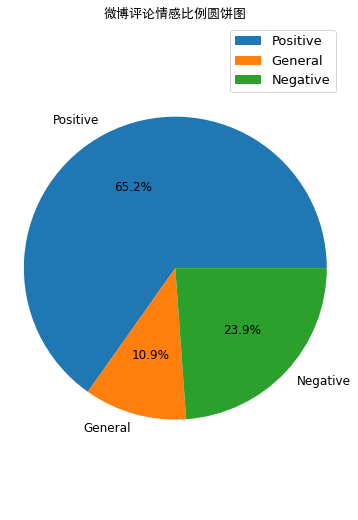

In [176]:
tag = 'Positive', 'General', 'Negative'
counts = [positive, general, negative]

plt.rcParams['font.sans-serif'] = [u'Arial Unicode MS']
plt.figure(figsize=(6,9))    # 顯示圖框架大小

#emscore = pd.read_csv("emotion_score.csv")
labels = tag      # 製作圓餅圖的類別標籤
size = counts                         # 製作圓餅圖的數值來源

plt.pie(size,                           # 數值
        labels = labels,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow = False)                    # 設定陰影

 
plt.axis('equal')                                          # 使圓餅圖比例相等
plt.title("微博评论情感比例圆饼图", {"fontsize" : 18}, fontproperties = WRYH)  # 設定標題及其文字大小
plt.legend(loc = "best")                                   # 設定圖例及其位置為最佳

plt.savefig("微博评论情感比例圆饼图.jpg",   # 儲存圖檔
            bbox_inches='tight',               # 去除座標軸占用的空間
            pad_inches=0.0)                    # 去除所有白邊
plt.show()
plt.close()      # 關閉圖表